<a href="https://colab.research.google.com/github/weversonmachado/MVP_CD/blob/main/MVP_Weverson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# MVP - Weverson Machado de Oliveira
# Fonte do dataset: https://brasil.io/dataset/covid19/files/

# 1 - Definição do problema

O dataset utilizado foi de casos de Covid registrados em 5298 cidades do Brasil entre os dias 25 de fevereiro de 2020 e 27 de março de 2022. O dataset apresenta diversos atributos como as cidades e estados onde foram feitos os registros, assim como,os casos confirmados, mortes e taxa de mortalidade dentre outros.
O dataset pode ser baixado do link: https://data.brasil.io/dataset/covid19/caso.csv.gz.

# Observação
  Devido ao dataset ser muito grande, o Git não pôde suportar o armazenamento do mesmo. Uma solução foi o armazenamento no Google Drive.

  O Google Drive pediu para fazer o login na conta do Google por este motivo foi feito prints da execução do código e upado para o Git. Logo abaixo no código é exibido as imagens da execução.

  Um subdataset foi extraido do dataset original e comitado para o Git. Este dataset foi possível abrir no Colab. Logo apóas as imagens vem a execução da segunda etapa dos códigos. 

In [2]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Importações
import pandas as pd
import numpy
import sys
import requests
from io import BytesIO
from io import StringIO
from PIL import Image
import itertools
import missingno as ms # para tratamento de missings
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização

numpy.set_printoptions(threshold=sys.maxsize) # Propriedade setada para exibir "todos" os dados na tela e não somente uma parte no colab

# 2 - Carga dos Dados

In [3]:
# # Montagem do drive virtual para acessar o Google Drive
# # O git não aceitou o tamanho do arquivo original, 330MB, por este motivo foi necessário o armazenamento no Google Drive
# # Foi necessário logar no google driver para montargem do drive virtual
# from google.colab import drive
# drive.mount('/content/gdrive', force_remount=True)
# %cd /content/gdrive/My Drive/Colab Notebooks/

In [4]:
# # Para desmontar o drive virtual:
# # drive.flush_and_unmount()

In [5]:
# # # Outra forma de acessar os dataset do Google Drive
# # # Não consegue carregar o dataset inteiro mesmo compartilhado, exibe somente um html mas consegue acessar o subdataset
# # url = 'https://drive.google.com/file/d/1liBio374qffSP7ONEtqjv7rqVv-UYt6t/view?usp=sharing'

# # # Consegue acessar o dataset parcial
# # url = 'https://drive.google.com/file/d/17-awgpdIE0c-blKYQPtSzP0HwxN3E7ZB/view?usp=sharing' 

# file_id = url.split('/')[-2]
# dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
# url2 = requests.get(dwn_url).text
# csv_raw = StringIO(url2)
# dfOrigin = pd.read_csv(csv_raw)


In [6]:
# # Carregamento do dataset para um Pandas Dataframe
# dfOrigin = pd.read_csv("caso.csv")

In [7]:
# dfOrigin.head()

# 3 - Análise dos Dados

In [8]:
# # Mostas as dimensões do dataset e a data inicial e final da coleta de dados
# print(dfOrigin.shape)
# print(dfOrigin['date'].min())
# print(dfOrigin['date'].max())

In [9]:
# Exibe o nome das colunas do dataset original
# dfOrigin.columns

In [10]:
# # Renomeando os nomes das colunas
# dfOrigin = dfOrigin.rename(columns={'date':'data', 'state':'estado','city':'cidade','place_type':'tipo_de_lugar', 'confirmed':'confirmado', 'deaths':'mortes',
#        'order_for_place':'pedido_de_lugar', 'is_last':'ultima_atualizacao', 'estimated_population_2019':'populacao_estimada_2019',
#        'estimated_population':'populacao_estimada', 'city_ibge_code':'codigo_ibge_cidade',
#        'confirmed_per_100k_inhabitants':'confirmado_por_100k_habitantes', 'death_rate':'taxa_mortalidade'})

In [11]:
# # Novos nomes das colunas
# dfOrigin.columns

In [12]:
# # Mostra as 10 primeiras linhas do dataset
# dfOrigin.head(10)

In [13]:
# # Mostra as 10 últimas linhas do dataset
# dfOrigin.tail(10)

In [14]:
# # Verificando nulls no dataset
# dfOrigin.isnull().sum()

In [15]:
# # Removendo as cidades (estado) como null
# dfOrigin.dropna(subset=['cidade'], inplace=True)

In [16]:
# # Exibindo as cidades pesquisadas
# print(len(dfOrigin['cidade'].unique()))
# print(dfOrigin['cidade'].unique())

In [17]:
# # Gerando uma lista de cidades a serem pesquisadas para gerar um subdataframe de tamanho reduzido para que o Git consiga armazenar
# cityList = ["Rio de Janeiro", "Belo Horizonte", "Juiz de Fora", "Ipatinga", "Governador Valadares", "Manhuaçu", "Caratinga", "Manhumirim", "Ipanema"]
# cityListTrue = []
# for cl in cityList:
#   retult = cl in dfOrigin['cidade'].values
#   if retult:
#     print("{} encontrado no dataframe dfOrigin".format(cl))
#     cityListTrue.append(cl)
#   else:
#     print("{} encontrado no dataframe dfOrigin".format(cl))


In [18]:
# # Criando um subdataframe com as cidades listadas em cityListTrue
# dfCovidCity = dfOrigin.loc[dfOrigin['cidade'].isin(cityListTrue)]

# print(len(dfCovidCity['cidade'].unique()))
# print(dfCovidCity['cidade'].unique())

In [19]:
# dfCovidCity

In [20]:
# # Ordenando o datafram por cidade e data
# dfCovidCity = dfCovidCity.sort_values(['cidade', 'data'])
# dfCovidCity

In [21]:
# # Salvando o dataframe do Google Drive (359KB)
# # Este é o arquivo que será enviador para o Git
# dfCovidCity = dfCovidCity.reset_index(drop=True)
# dfCovidCity.to_csv("CovidCity.csv")

In [22]:
# # Desmontando o drive virtual do Google Drive
# drive.flush_and_unmount()

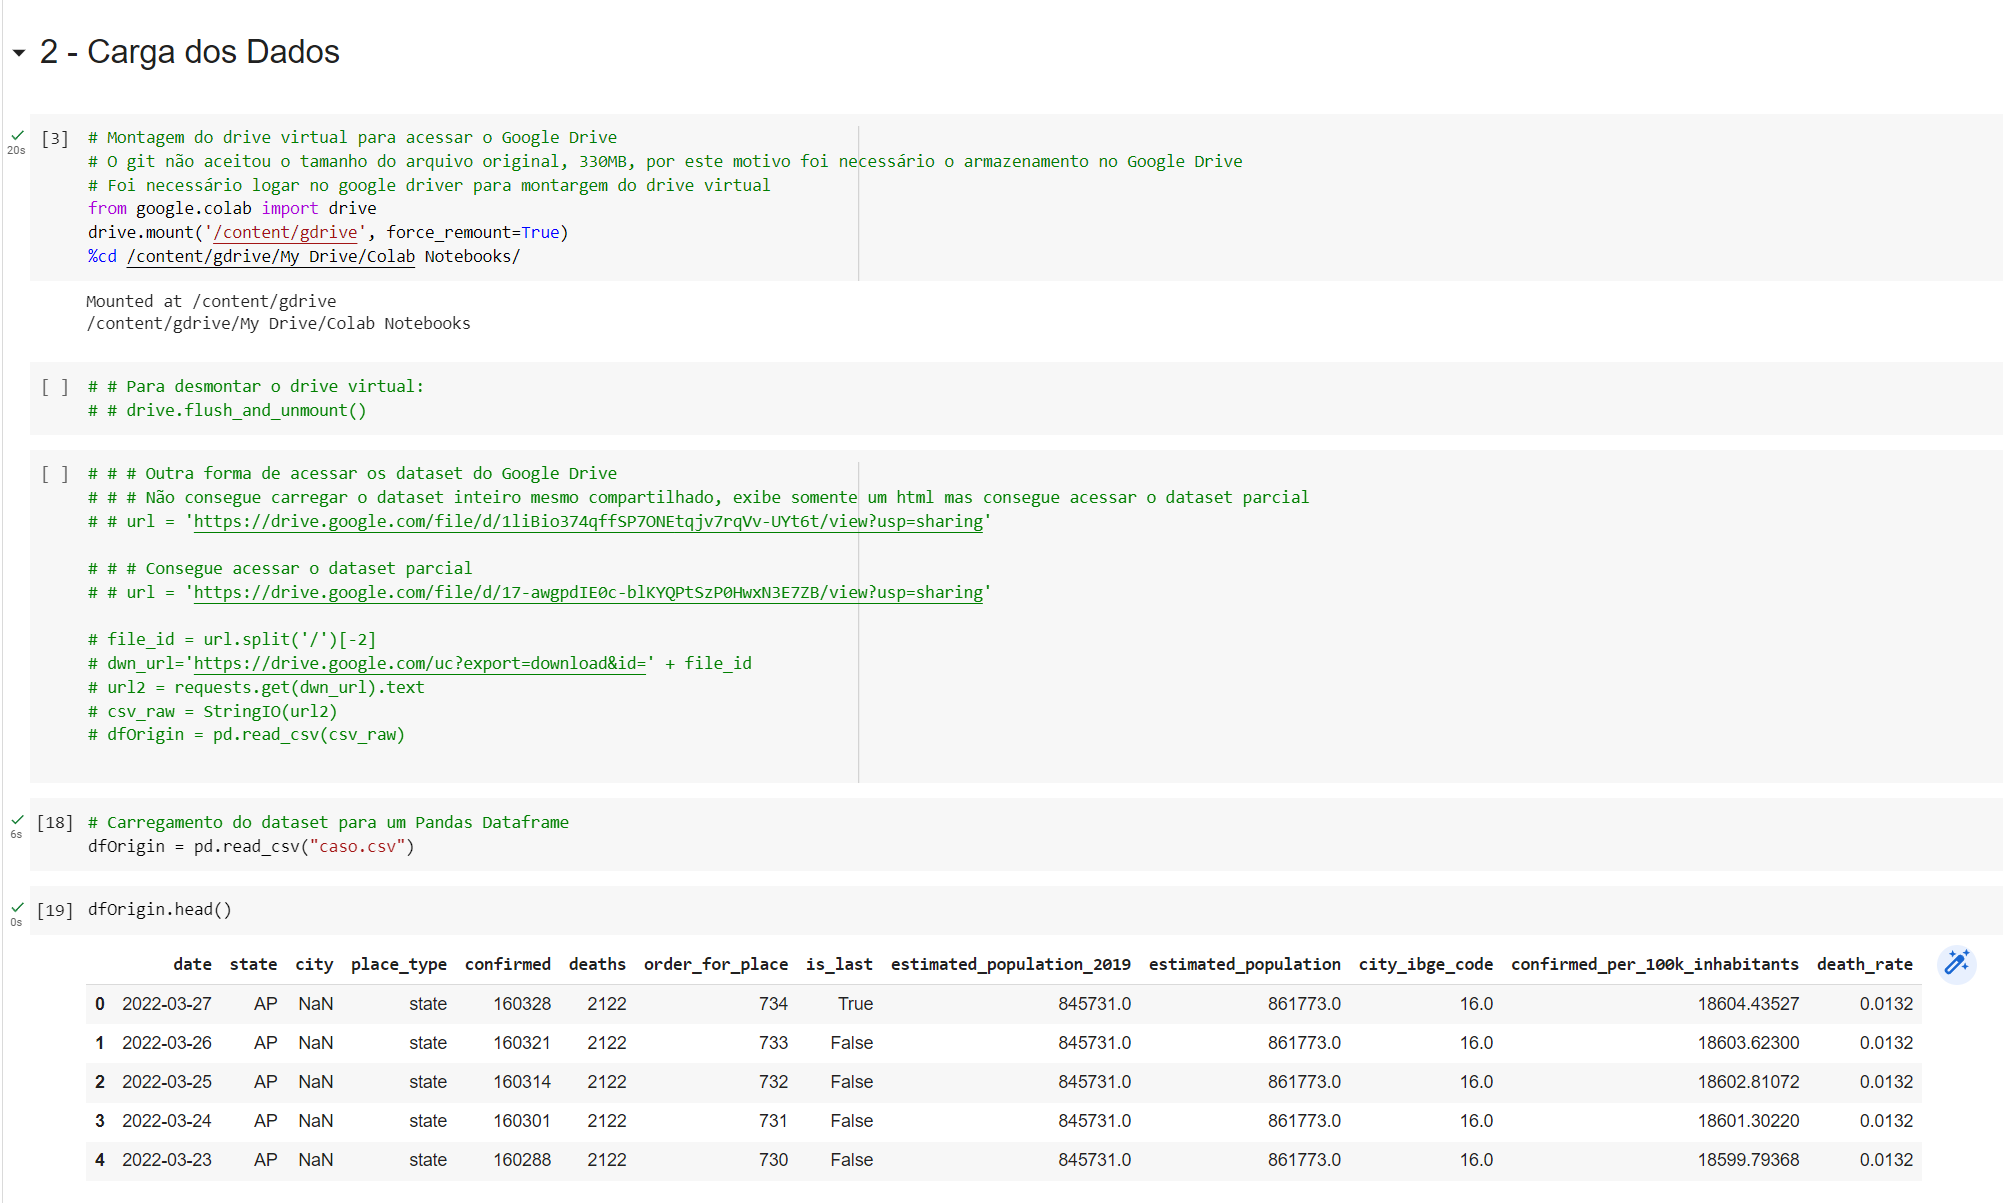

In [23]:
# Fazendo a leitura das imagens da execução do código acima
urlMontageDriveLeitura = 'https://github.com/weversonmachado/MVP_CD/raw/mvp/CargaDosDados.PNG'
pageMontageDriveLeitura = requests.get(urlMontageDriveLeitura)
Image.open(BytesIO(pageMontageDriveLeitura.content))

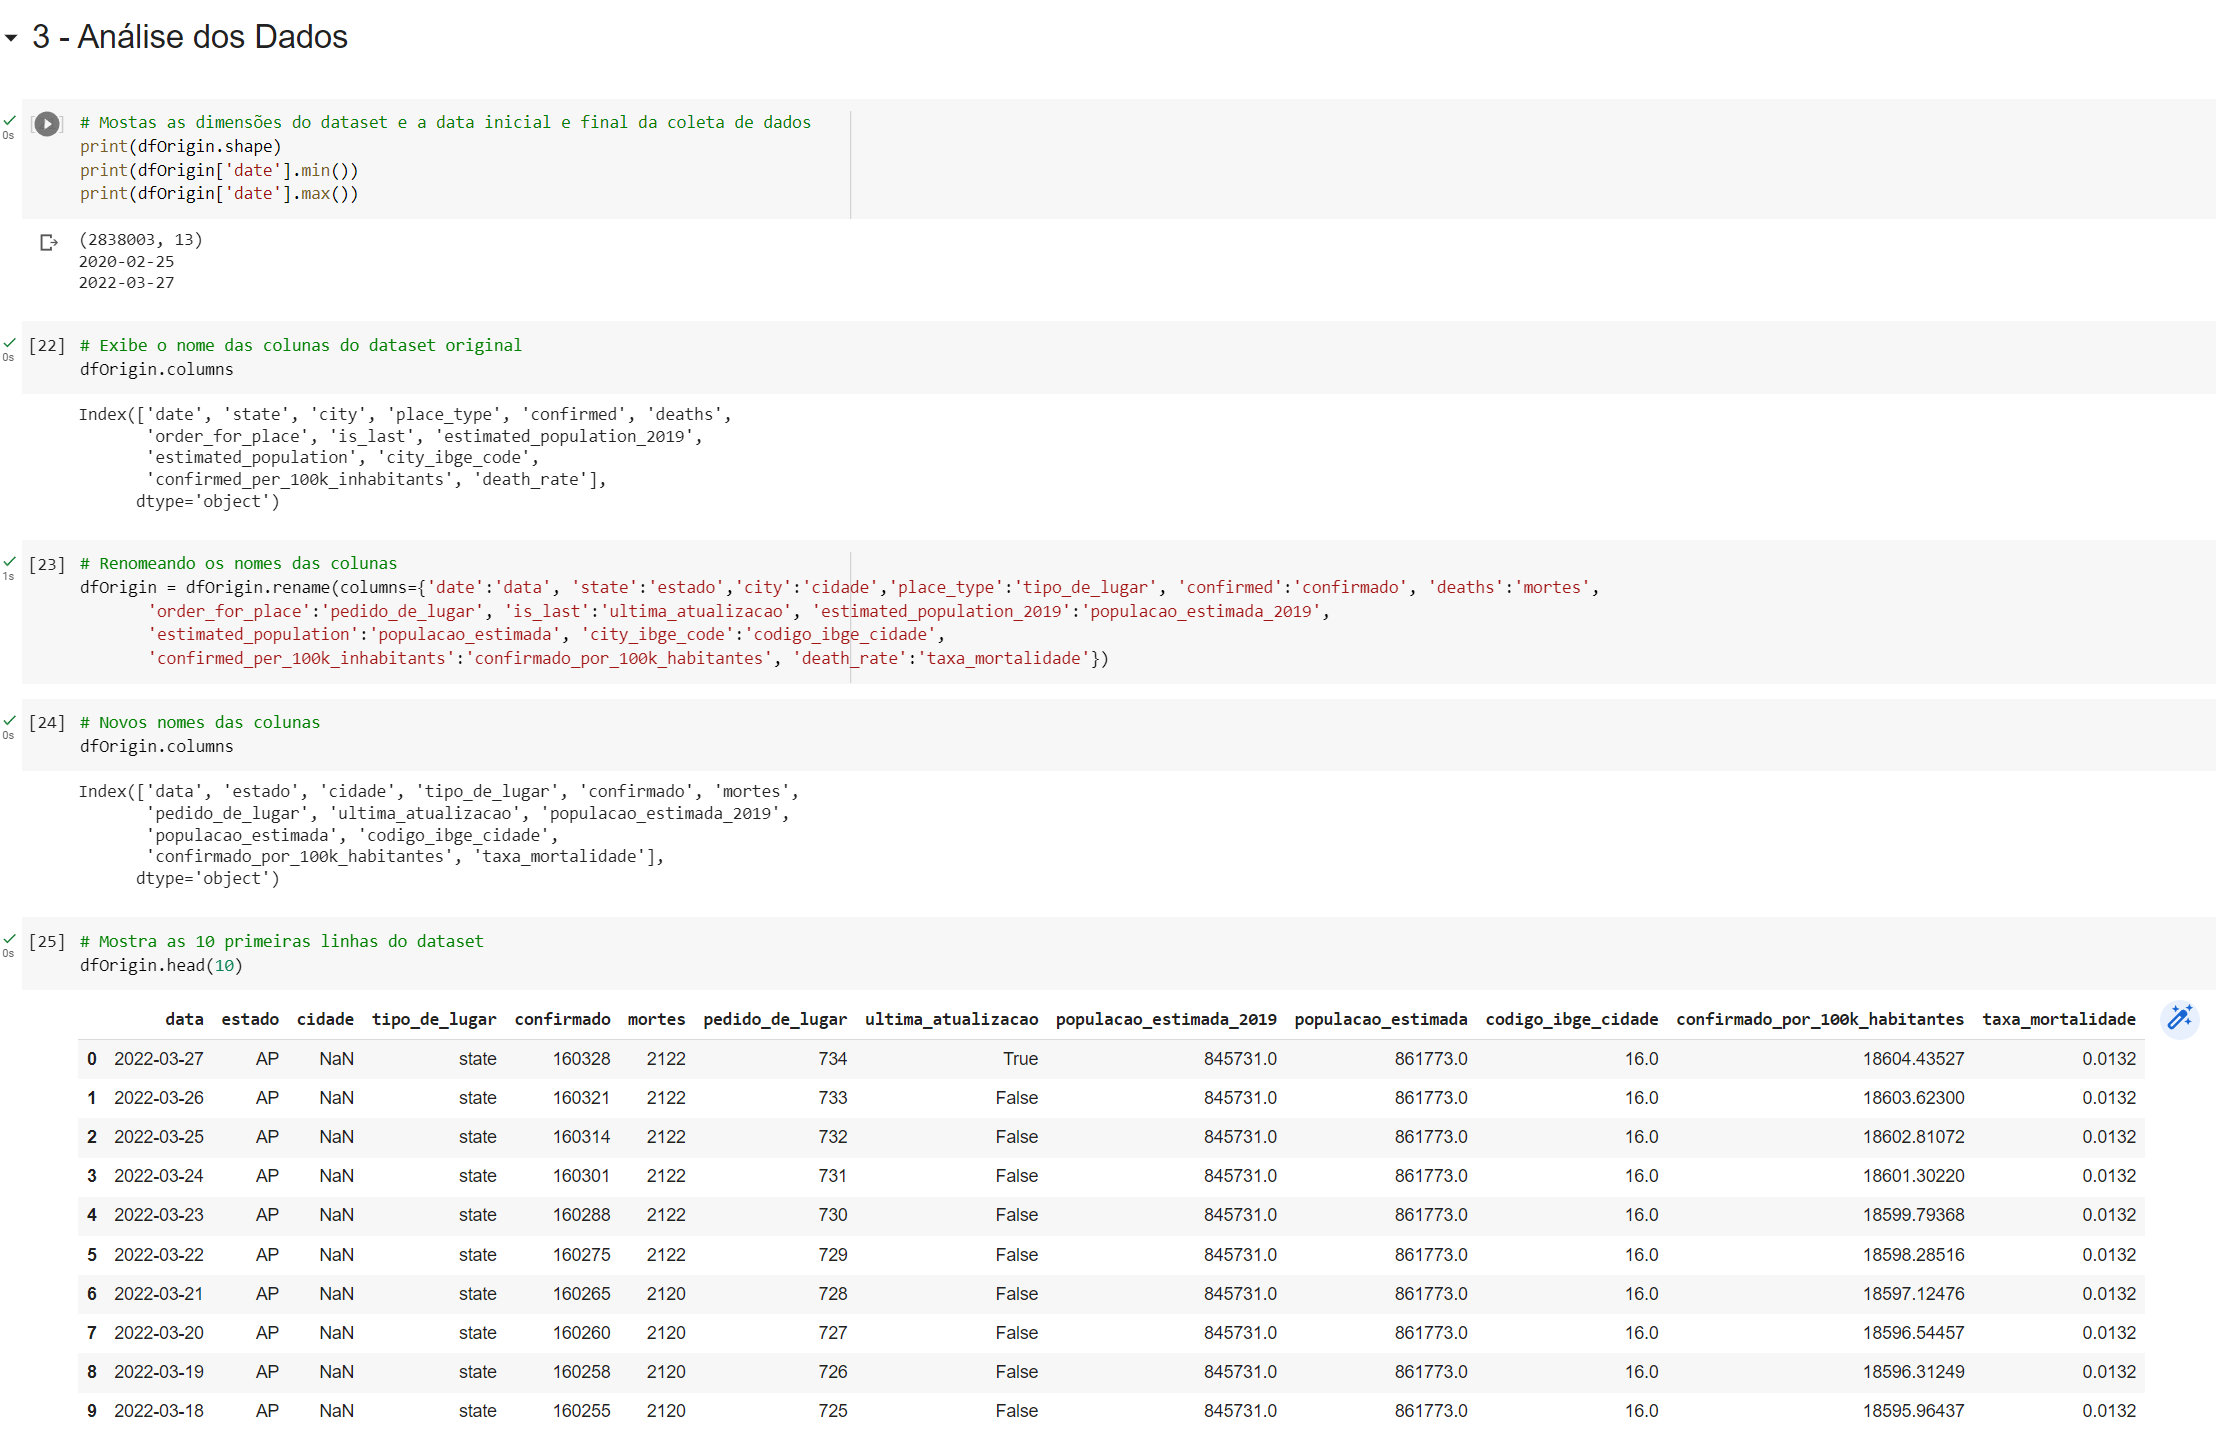

In [24]:
urlAnaliseDeDados = 'https://github.com/weversonmachado/MVP_CD/raw/mvp/AnaliseDeDados1.PNG'
pageAnaliseDeDados = requests.get(urlAnaliseDeDados)
Image.open(BytesIO(pageAnaliseDeDados.content))

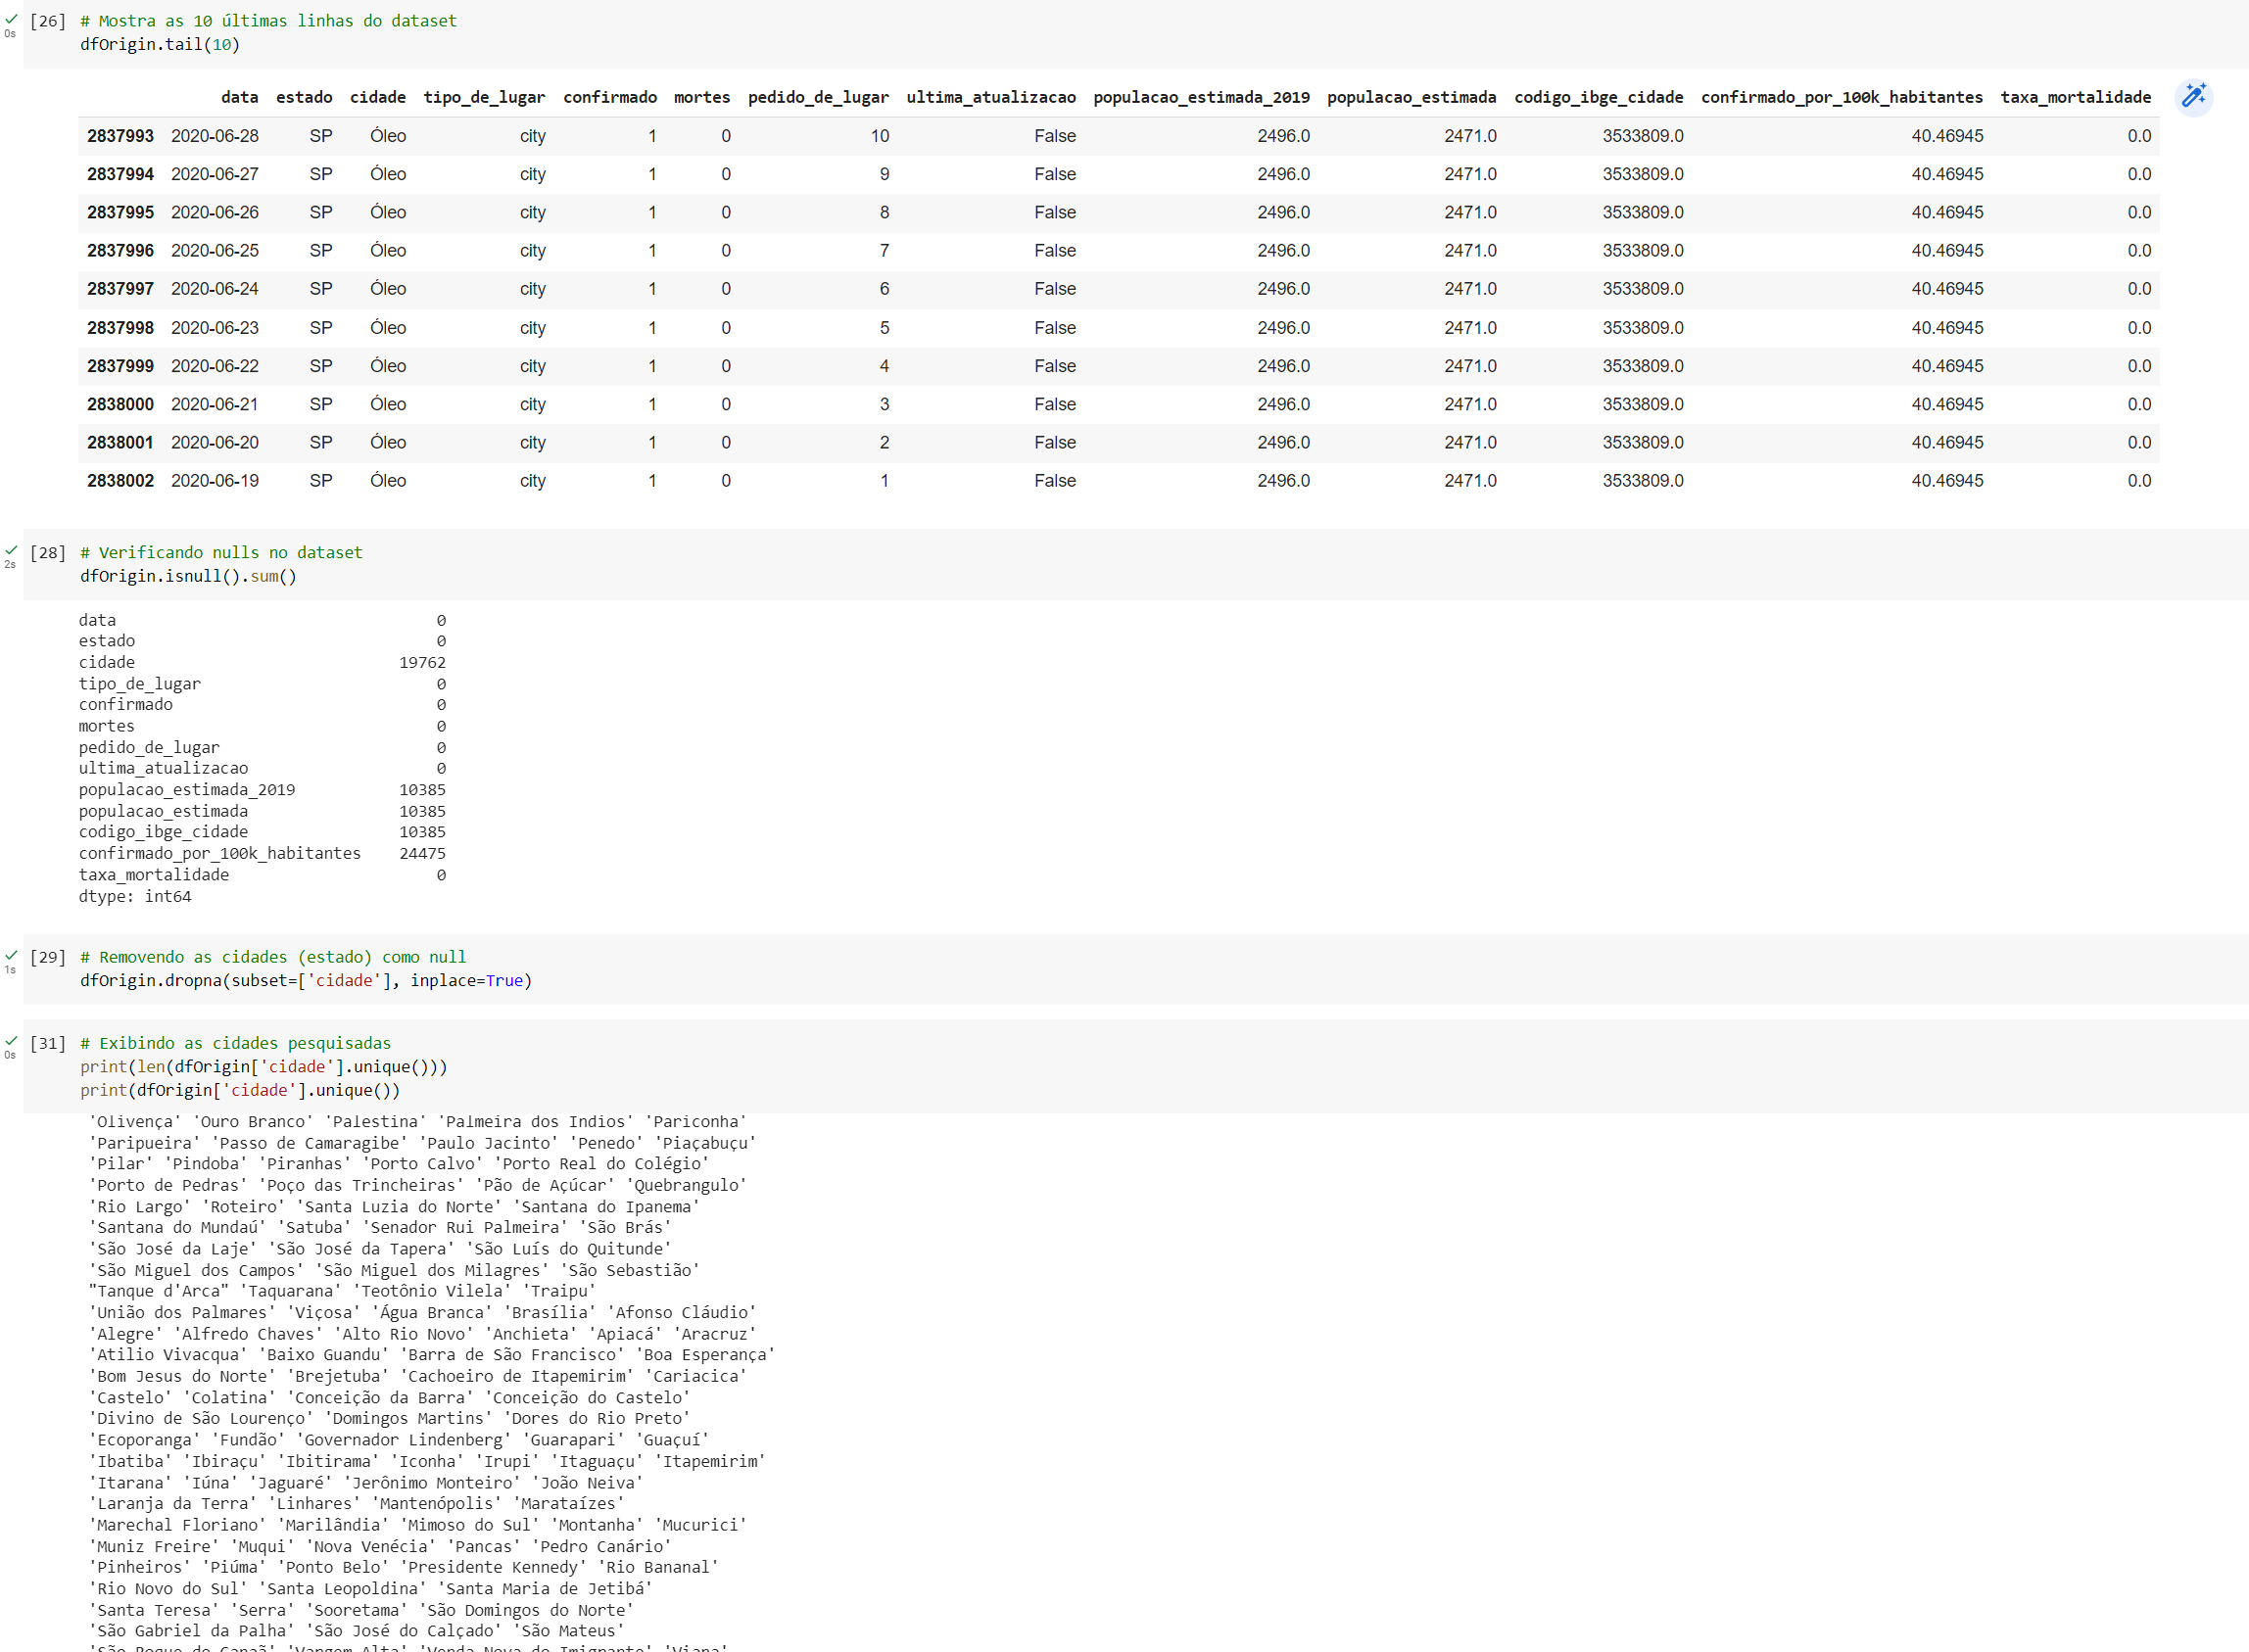

In [25]:
urlAnaliseDeDados = 'https://github.com/weversonmachado/MVP_CD/raw/mvp/AnaliseDeDados2.PNG'
pageAnaliseDeDados = requests.get(urlAnaliseDeDados)
Image.open(BytesIO(pageAnaliseDeDados.content))

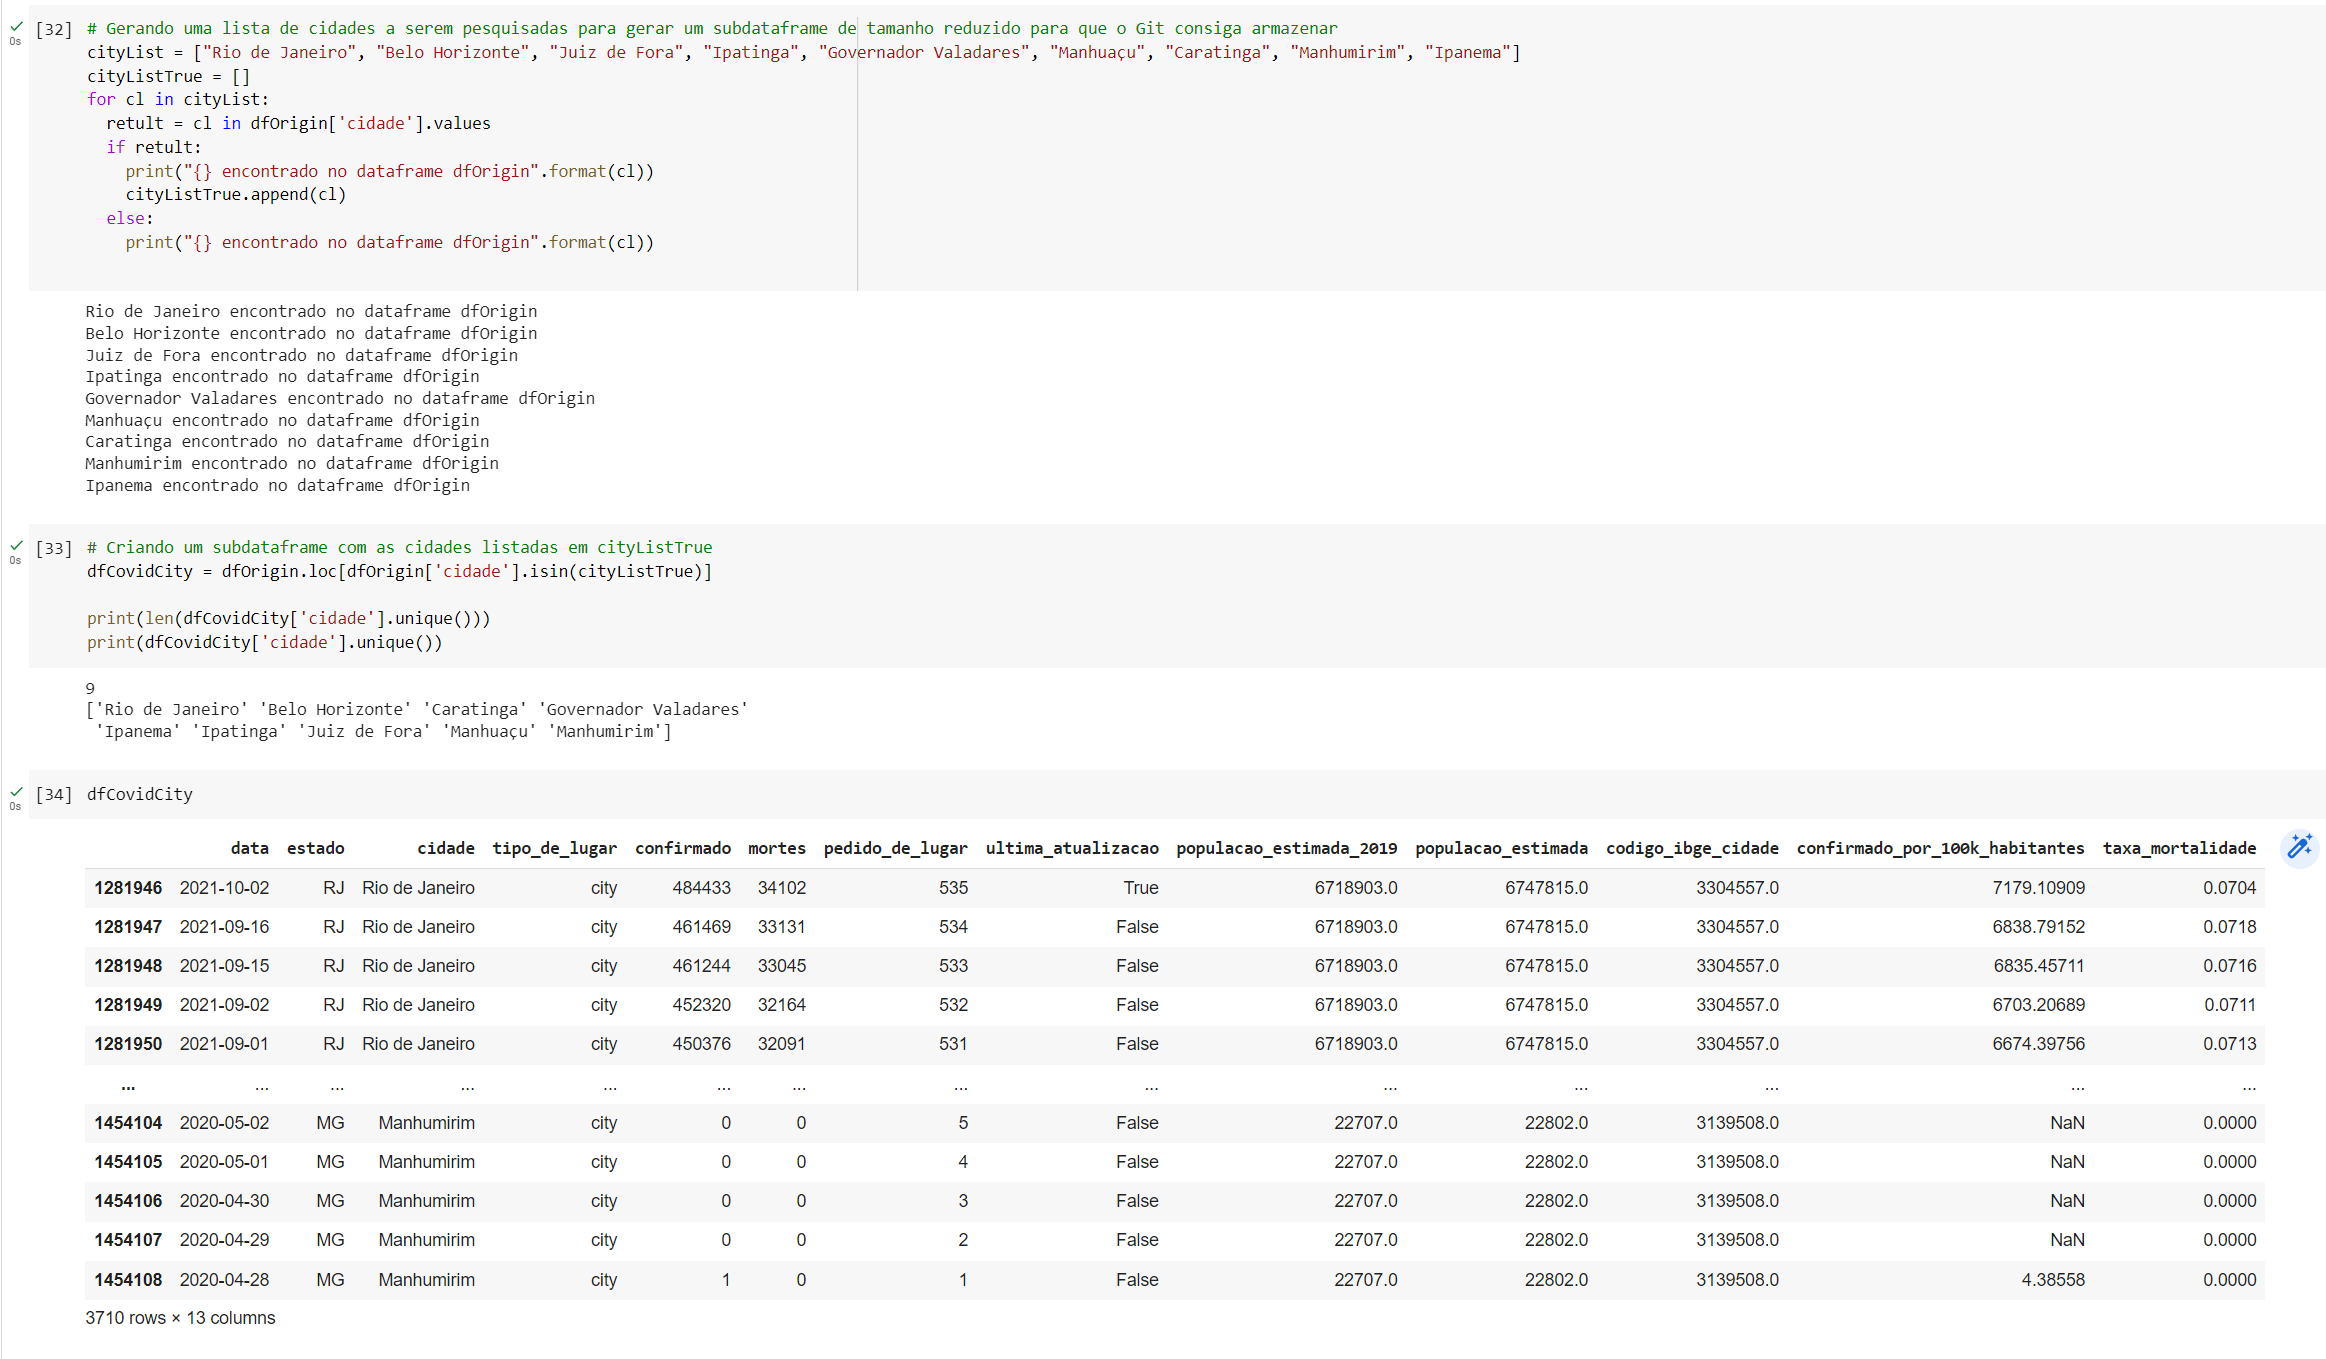

In [26]:
urlAnaliseDeDados = 'https://github.com/weversonmachado/MVP_CD/raw/mvp/AnaliseDeDados3.PNG'
pageAnaliseDeDados = requests.get(urlAnaliseDeDados)
Image.open(BytesIO(pageAnaliseDeDados.content))

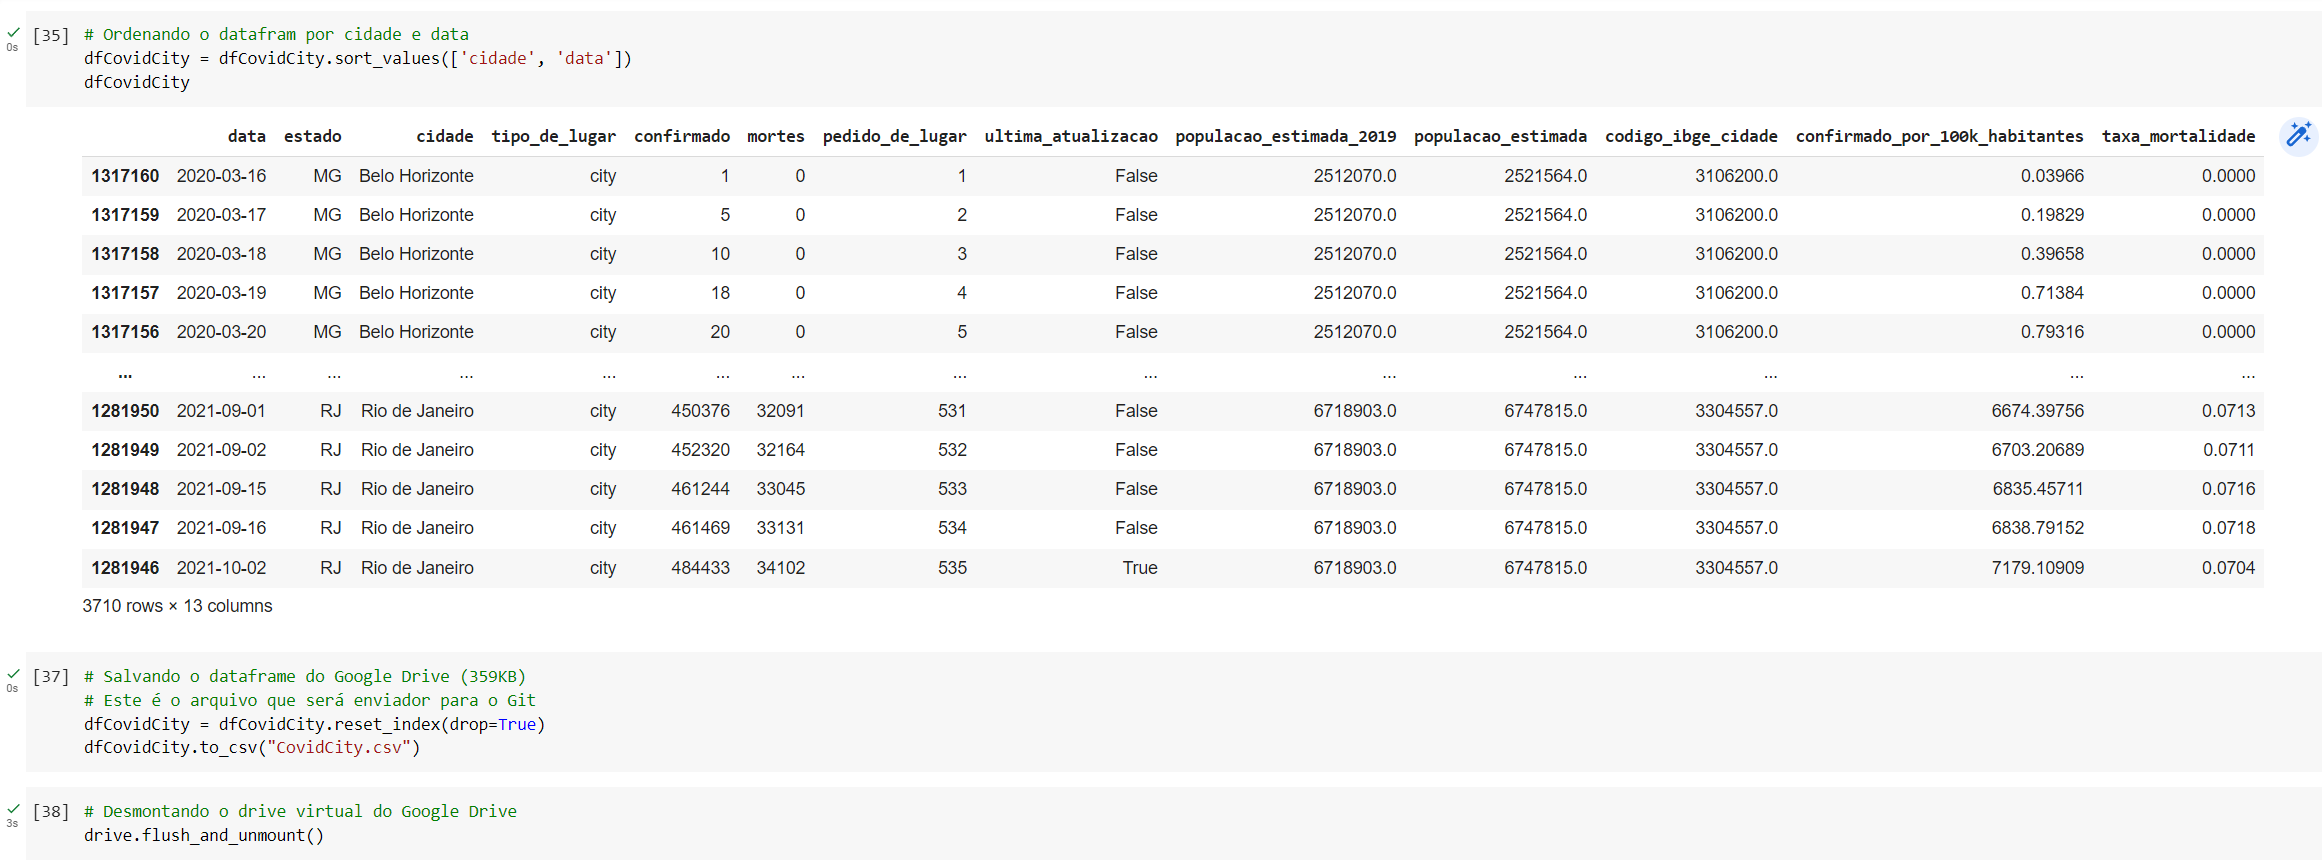

In [27]:
urlAnaliseDeDados = 'https://github.com/weversonmachado/MVP_CD/raw/mvp/AnaliseDeDados4.PNG'
pageAnaliseDeDados = requests.get(urlAnaliseDeDados)
Image.open(BytesIO(pageAnaliseDeDados.content))

# 4 - Nova carga de dados do subdataset armazenado no Git

In [28]:
# Leitura do dataset do Git
url = 'https://raw.githubusercontent.com/weversonmachado/MVP_CD/mvp/CovidCity.csv'
dfMain = pd.read_csv(url)

# 5 - Análise dos Dados do Subdataset

5.1 - Estatística Descritiva

In [29]:
dfMain.head(10)

,Unnamed: 0,data,estado,cidade,tipo_do_local,confirmados,mortes,pedido_de_lugar,por_ultimo,populacao_estimada_2019,populacao_estimada,codigo_ibge_da_cidade,confirmado_por_100k_habitantes,indice_de_mortalidade
0,0,2020-03-16,MG,Belo Horizonte,city,1,0,1,False,2512070.0,2521564.0,3106200.0,0.03966,0.0
1,1,2020-03-17,MG,Belo Horizonte,city,5,0,2,False,2512070.0,2521564.0,3106200.0,0.19829,0.0
2,2,2020-03-18,MG,Belo Horizonte,city,10,0,3,False,2512070.0,2521564.0,3106200.0,0.39658,0.0
3,3,2020-03-19,MG,Belo Horizonte,city,18,0,4,False,2512070.0,2521564.0,3106200.0,0.71384,0.0
4,4,2020-03-20,MG,Belo Horizonte,city,20,0,5,False,2512070.0,2521564.0,3106200.0,0.79316,0.0
5,5,2020-03-21,MG,Belo Horizonte,city,30,0,6,False,2512070.0,2521564.0,3106200.0,1.18974,0.0
6,6,2020-03-23,MG,Belo Horizonte,city,60,0,7,False,2512070.0,2521564.0,3106200.0,2.37948,0.0
7,7,2020-03-24,MG,Belo Horizonte,city,87,0,8,False,2512070.0,2521564.0,3106200.0,3.45024,0.0
8,8,2020-03-25,MG,Belo Horizonte,city,90,0,9,False,2512070.0,2521564.0,3106200.0,3.56921,0.0
9,9,2020-03-26,MG,Belo Horizonte,city,96,0,10,False,2512070.0,2521564.0,3106200.0,3.80716,0.0


In [30]:
# Exibindo as ultimas 10 linhas
dfMain.tail(10)

,Unnamed: 0,data,estado,cidade,tipo_do_local,confirmados,mortes,pedido_de_lugar,por_ultimo,populacao_estimada_2019,populacao_estimada,codigo_ibge_da_cidade,confirmado_por_100k_habitantes,indice_de_mortalidade
3280,3280,2021-08-27,RJ,Rio de Janeiro,city,443315,31799,526,False,6718903.0,6747815.0,3304557.0,6569.75628,0.0717
3281,3281,2021-08-28,RJ,Rio de Janeiro,city,445417,31880,527,False,6718903.0,6747815.0,3304557.0,6600.90711,0.0716
3282,3282,2021-08-29,RJ,Rio de Janeiro,city,445925,31884,528,False,6718903.0,6747815.0,3304557.0,6608.43547,0.0715
3283,3283,2021-08-30,RJ,Rio de Janeiro,city,446170,31887,529,False,6718903.0,6747815.0,3304557.0,6612.06628,0.0715
3284,3284,2021-08-31,RJ,Rio de Janeiro,city,448502,32000,530,False,6718903.0,6747815.0,3304557.0,6646.62561,0.0713
3285,3285,2021-09-01,RJ,Rio de Janeiro,city,450376,32091,531,False,6718903.0,6747815.0,3304557.0,6674.39756,0.0713
3286,3286,2021-09-02,RJ,Rio de Janeiro,city,452320,32164,532,False,6718903.0,6747815.0,3304557.0,6703.20689,0.0711
3287,3287,2021-09-15,RJ,Rio de Janeiro,city,461244,33045,533,False,6718903.0,6747815.0,3304557.0,6835.45711,0.0716
3288,3288,2021-09-16,RJ,Rio de Janeiro,city,461469,33131,534,False,6718903.0,6747815.0,3304557.0,6838.79152,0.0718
3289,3289,2021-10-02,RJ,Rio de Janeiro,city,484433,34102,535,True,6718903.0,6747815.0,3304557.0,7179.10909,0.0704


In [31]:
# Dimensões do dataset
dfMain.shape

(3290, 14)

In [32]:
# Informações do dataset
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      3290 non-null   int64  
 1   data                            3290 non-null   object 
 2   estado                          3290 non-null   object 
 3   cidade                          3290 non-null   object 
 4   tipo_do_local                   3290 non-null   object 
 5   confirmados                     3290 non-null   int64  
 6   mortes                          3290 non-null   int64  
 7   pedido_de_lugar                 3290 non-null   int64  
 8   por_ultimo                      3290 non-null   bool   
 9   populacao_estimada_2019         3290 non-null   float64
 10  populacao_estimada              3290 non-null   float64
 11  codigo_ibge_da_cidade           3290 non-null   float64
 12  confirmado_por_100k_habitantes  32

In [33]:
# Removendo a primeira coluna do dataframe
dfMain.drop('Unnamed: 0', axis=1, inplace=True)

In [34]:
# Informações do dataset
dfMain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3290 entries, 0 to 3289
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            3290 non-null   object 
 1   estado                          3290 non-null   object 
 2   cidade                          3290 non-null   object 
 3   tipo_do_local                   3290 non-null   object 
 4   confirmados                     3290 non-null   int64  
 5   mortes                          3290 non-null   int64  
 6   pedido_de_lugar                 3290 non-null   int64  
 7   por_ultimo                      3290 non-null   bool   
 8   populacao_estimada_2019         3290 non-null   float64
 9   populacao_estimada              3290 non-null   float64
 10  codigo_ibge_da_cidade           3290 non-null   float64
 11  confirmado_por_100k_habitantes  3246 non-null   float64
 12  indice_de_mortalidade           32

In [35]:
# Resumo estatístico do dataset
dfMain.describe()

,confirmados,mortes,pedido_de_lugar,populacao_estimada_2019,populacao_estimada,codigo_ibge_da_cidade,confirmado_por_100k_habitantes,indice_de_mortalidade
count,3290.000000,3290.000000,3290.000000,3.290000e+03,3.290000e+03,3.290000e+03,3246.000000,3290.000000
mean,39944.008207,2760.719757,209.484802,1.507433e+06,1.513947e+06,3.155738e+06,3250.435689,0.035959
std,84792.848023,6706.184167,125.006023,2.427927e+06,2.438199e+06,6.647843e+04,2952.845860,0.033823
min,0.000000,0.000000,1.000000,1.986100e+04,2.000000e+04,3.106200e+06,0.014820,0.000000
25%,611.000000,13.000000,103.000000,9.022900e+04,9.116900e+04,3.127701e+06,890.406750,0.020400
50%,3916.000000,103.000000,206.000000,2.634100e+05,2.654090e+05,3.131307e+06,2526.094200,0.025800
75%,25989.000000,791.000000,309.000000,2.512070e+06,2.521564e+06,3.139508e+06,4990.000000,0.033900
max,484433.000000,34102.000000,535.000000,6.718903e+06,6.747815e+06,3.304557e+06,14030.000000,0.400000


In [36]:
# Verificando nulls no dataset
dfMain.isnull().sum()

data                               0
estado                             0
cidade                             0
tipo_do_local                      0
confirmados                        0
mortes                             0
pedido_de_lugar                    0
por_ultimo                         0
populacao_estimada_2019            0
populacao_estimada                 0
codigo_ibge_da_cidade              0
confirmado_por_100k_habitantes    44
indice_de_mortalidade              0
dtype: int64

In [37]:
# Exibindo a(s) cidade(s) com null em 'confirmado_por_100k_habitantes'
dfTmp = dfMain[dfMain.isna().any(axis=1)]
dfTmp['cidade'].unique()

array(['Manhumirim'], dtype=object)

In [38]:
# Gerando novo dataframe com alguns campos para serem avaliadas
data = dfMain[['data','cidade','confirmados','mortes','por_ultimo']]
data

,data,cidade,confirmados,mortes,por_ultimo
0,2020-03-16,Belo Horizonte,1,0,False
1,2020-03-17,Belo Horizonte,5,0,False
2,2020-03-18,Belo Horizonte,10,0,False
3,2020-03-19,Belo Horizonte,18,0,False
4,2020-03-20,Belo Horizonte,20,0,False
...,...,...,...,...,...
3285,2021-09-01,Rio de Janeiro,450376,32091,False
3286,2021-09-02,Rio de Janeiro,452320,32164,False
3287,2021-09-15,Rio de Janeiro,461244,33045,False
3288,2021-09-16,Rio de Janeiro,461469,33131,False


# 6 - Visualizações e Tratamentos

In [39]:
# Exibindo os dados de uma cidade em específico
cidade = 'Rio de Janeiro'
dfCidade = data.loc[data.cidade==cidade]
dfCidade

,data,cidade,confirmados,mortes,por_ultimo
2755,2020-03-06,Rio de Janeiro,1,0,False
2756,2020-03-08,Rio de Janeiro,2,0,False
2757,2020-03-12,Rio de Janeiro,13,0,False
2758,2020-03-15,Rio de Janeiro,22,0,False
2759,2020-03-16,Rio de Janeiro,23,0,False
...,...,...,...,...,...
3285,2021-09-01,Rio de Janeiro,450376,32091,False
3286,2021-09-02,Rio de Janeiro,452320,32164,False
3287,2021-09-15,Rio de Janeiro,461244,33045,False
3288,2021-09-16,Rio de Janeiro,461469,33131,False


In [40]:
# Resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dfCidade.describe()

,confirmados,mortes
count,535.000000,535.000000
mean,172508.390654,15039.646729
std,129701.051428,9623.728623
min,1.000000,0.000000
25%,69970.000000,8038.000000
50%,145763.000000,13676.000000
75%,252448.500000,23157.000000
max,484433.000000,34102.000000


In [41]:
# Agrupando por 'data' os casos confirmados e resetando o index
dfCidade = dfCidade.groupby('data').sum()['confirmados'].reset_index()
dfCidade

,data,confirmados
0,2020-03-06,1
1,2020-03-08,2
2,2020-03-12,13
3,2020-03-15,22
4,2020-03-16,23
...,...,...
530,2021-09-01,450376
531,2021-09-02,452320
532,2021-09-15,461244
533,2021-09-16,461469


In [42]:
# alterando o nome dos casos confirmados pelo nome da cidade
dfCidade.columns = ['data', cidade]

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.]),
 [Text(-100.0, 0, '2021-05-28'),
  Text(0.0, 0, '2020-03-06'),
  Text(100.0, 0, '2020-06-22'),
  Text(200.0, 0, '2020-10-02'),
  Text(300.0, 0, '2021-01-10'),
  Text(400.0, 0, '2021-04-23'),
  Text(500.0, 0, '2021-08-02'),
  Text(600.0, 0, '')])

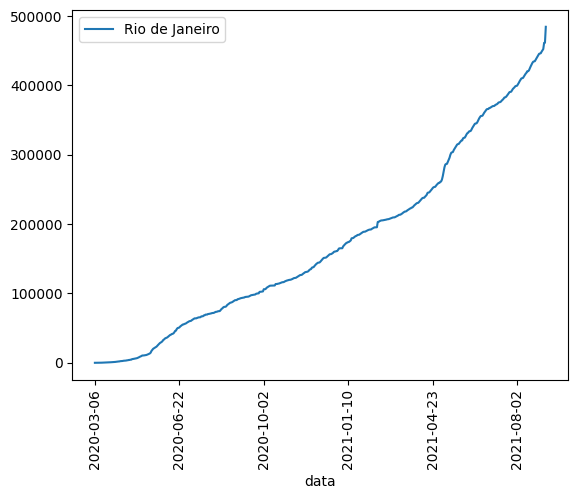

In [43]:
# gráfico da evolução do Covid no tempo
dfCidade.plot(x='data', y=cidade)
plt.xticks(rotation = 90)

In [44]:
# Criando uma lista de cidades para serem avaliadas (poderia ser feito no dataset principal que não pôde subir para o git por causa do tamanho)
cityList = ["Rio de Janeiro", "Belo Horizonte", "Juiz de Fora", "Ipatinga", "Governador Valadares", "Manhuaçu", "Caratinga", "Manhumirim", "Ipanema"]
cityListTrue = []
for cl in cityList:
  retult = cl in dfMain['cidade'].values
  if retult:
    print("{} encontrado no dataframe data".format(cl))
    cityListTrue.append(cl)
  else:
    print("{} encontrado no dataframe dfOrigin".format(cl))
    
cityListTrue.sort()

Rio de Janeiro encontrado no dataframe data
Belo Horizonte encontrado no dataframe data
Juiz de Fora encontrado no dataframe dfOrigin
Ipatinga encontrado no dataframe data
Governador Valadares encontrado no dataframe data
Manhuaçu encontrado no dataframe data
Caratinga encontrado no dataframe data
Manhumirim encontrado no dataframe data
Ipanema encontrado no dataframe data


In [45]:
# Função que recebe uma lista de cidade(s) e a situação (confirmados, mortes, etc) e retorna um dataframe
def selecaoDados(cityListTrue, situacao):
    dfConfirmedCovid = pd.DataFrame(columns=['data'])
    for cl in cityListTrue:
        cidade = cl
        dfCidade = data.loc[data.cidade==cidade]
        dfCidade = dfCidade.groupby('data').sum()[situacao].reset_index()
        dfCidade.columns = ['data', cidade]
        dfConfirmedCovid = pd.merge(dfConfirmedCovid, dfCidade, how='outer', on='data', suffixes=('', '_delme'))
        
    return dfConfirmedCovid

In [46]:
dfCovidConfirmado = selecaoDados(cityListTrue, 'confirmados')
dfCovidConfirmado

,data,Belo Horizonte,Caratinga,Governador Valadares,Ipanema,Ipatinga,Manhuaçu,Manhumirim,Rio de Janeiro
0,2020-03-16,1.0,NaN,NaN,NaN,1.0,NaN,NaN,23.0
1,2020-03-17,5.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,2020-03-18,10.0,NaN,NaN,NaN,1.0,NaN,NaN,55.0
3,2020-03-19,18.0,NaN,NaN,NaN,1.0,NaN,NaN,56.0
4,2020-03-20,20.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
545,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450376.0
546,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,452320.0
547,2021-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461244.0
548,2021-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461469.0


In [47]:
# Resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dfCovidConfirmado.describe()

,Belo Horizonte,Caratinga,Governador Valadares,Ipanema,Ipatinga,Manhuaçu,Manhumirim,Rio de Janeiro
count,419.000000,372.000000,410.000000,349.000000,422.000000,406.000000,377.000000,535.000000
mean,65812.446301,3142.768817,9988.246341,762.899713,11437.620853,2249.672414,736.862069,172508.390654
std,69150.518132,2756.589310,8663.733913,788.399465,9872.304865,1999.335267,523.230546,129701.051428
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,5475.000000,873.000000,1557.750000,179.000000,1598.500000,292.000000,291.000000,69970.000000
50%,46171.000000,2043.000000,8359.000000,446.000000,9282.500000,1859.000000,619.000000,145763.000000
75%,99219.000000,4782.750000,15244.000000,1076.000000,18206.250000,4080.250000,1153.000000,252448.500000
max,278370.000000,10023.000000,31686.000000,2806.000000,32982.000000,7550.000000,2243.000000,484433.000000


['Belo Horizonte', 'Caratinga', 'Governador Valadares', 'Ipanema', 'Ipatinga', 'Manhuaçu']


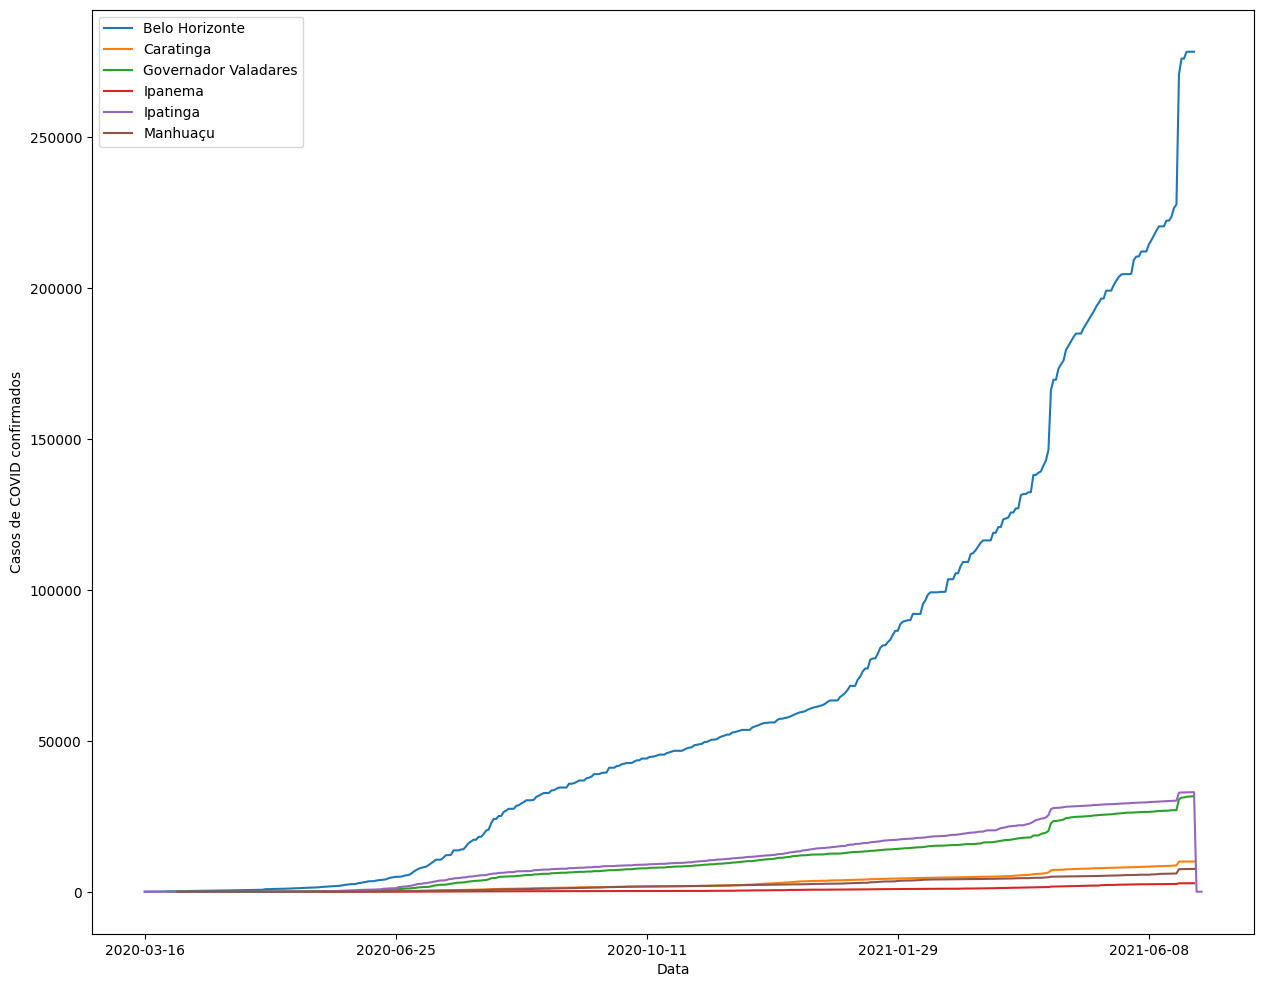

In [48]:
# Gráfico das cidades sem o Rio de Janeiro
print(cityListTrue[:-2])
dfCovidConfirmado.plot(x = 'data', y = cityListTrue[:-2], kind="line", figsize=(15,12))
plt.ylabel('Casos de COVID confirmados')
plt.xlabel('Data')
# plt.xticks(rotation = 90)
plt.show()

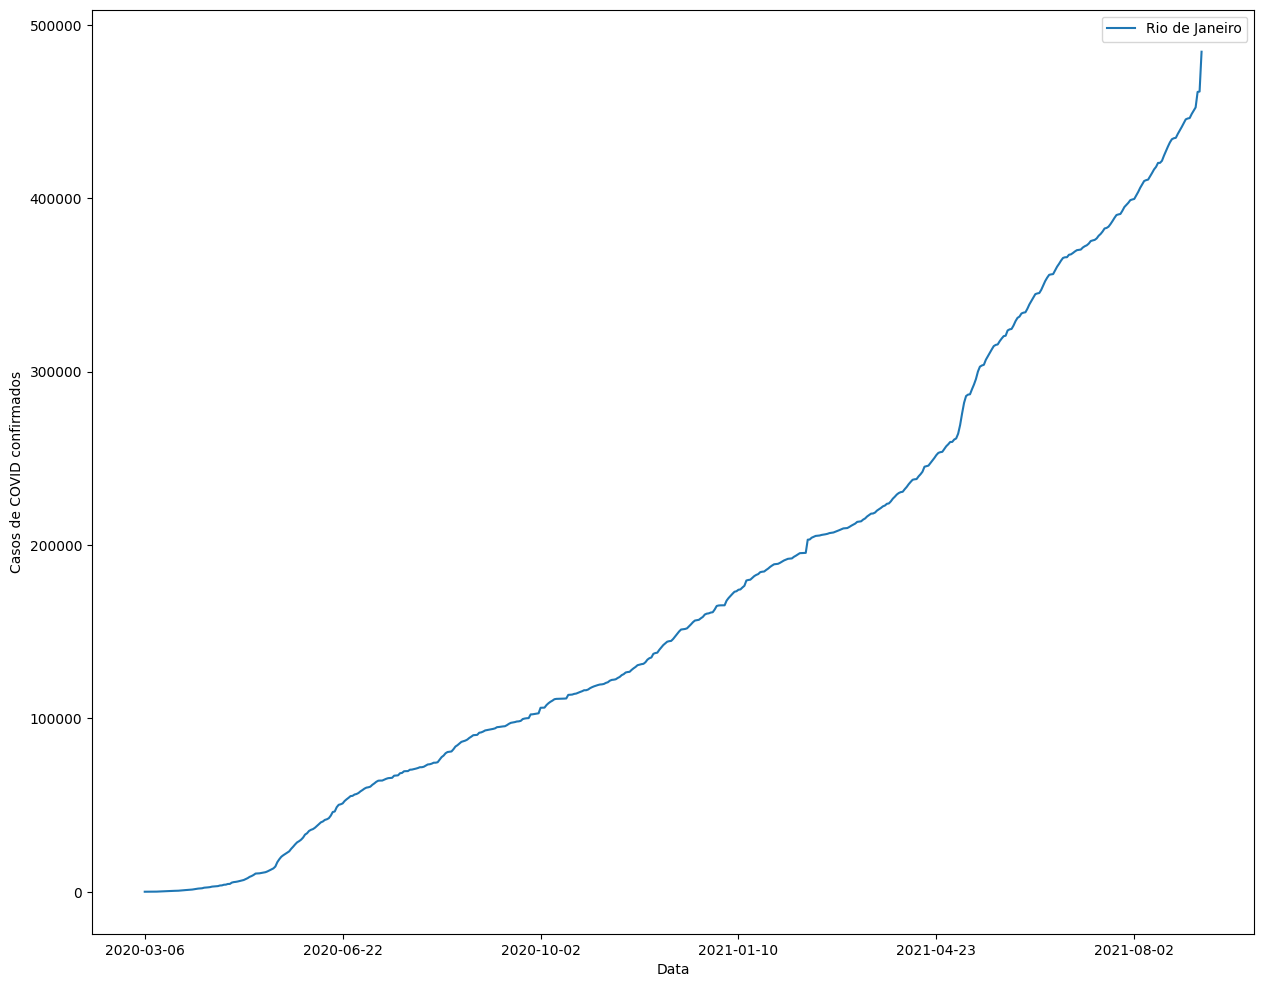

In [49]:
# Gerando gráfico por cidade
cidade = ['Rio de Janeiro']
dfCidade = selecaoDados(cidade, 'confirmados')
dfCidade.plot(x = 'data', y = cidade, kind="line", figsize=(15,12))
plt.ylabel('Casos de COVID confirmados')
plt.xlabel('Data')
# plt.xticks(rotation = 90)
plt.show()

In [50]:
# Tratamento de Missings
# Verificando nulls no dataset
dfCovidConfirmado.isnull().sum()

data                      0
Belo Horizonte          131
Caratinga               178
Governador Valadares    140
Ipanema                 201
Ipatinga                128
Manhuaçu                144
Manhumirim              173
Rio de Janeiro           15
dtype: int64

In [51]:
# Novo dataframe para tratamento de missings
colName = list(dfCovidConfirmado.columns)
dataSetNoMissing = dfCovidConfirmado[colName[:]]

# substituindo os zeros por NaN
dataSetNoMissing.replace(0, numpy.nan, inplace=True)

dataSetNoMissing.isnull().sum()


data                      0
Belo Horizonte          131
Caratinga               178
Governador Valadares    140
Ipanema                 201
Ipatinga                128
Manhuaçu                144
Manhumirim              217
Rio de Janeiro           15
dtype: int64

<Axes: >

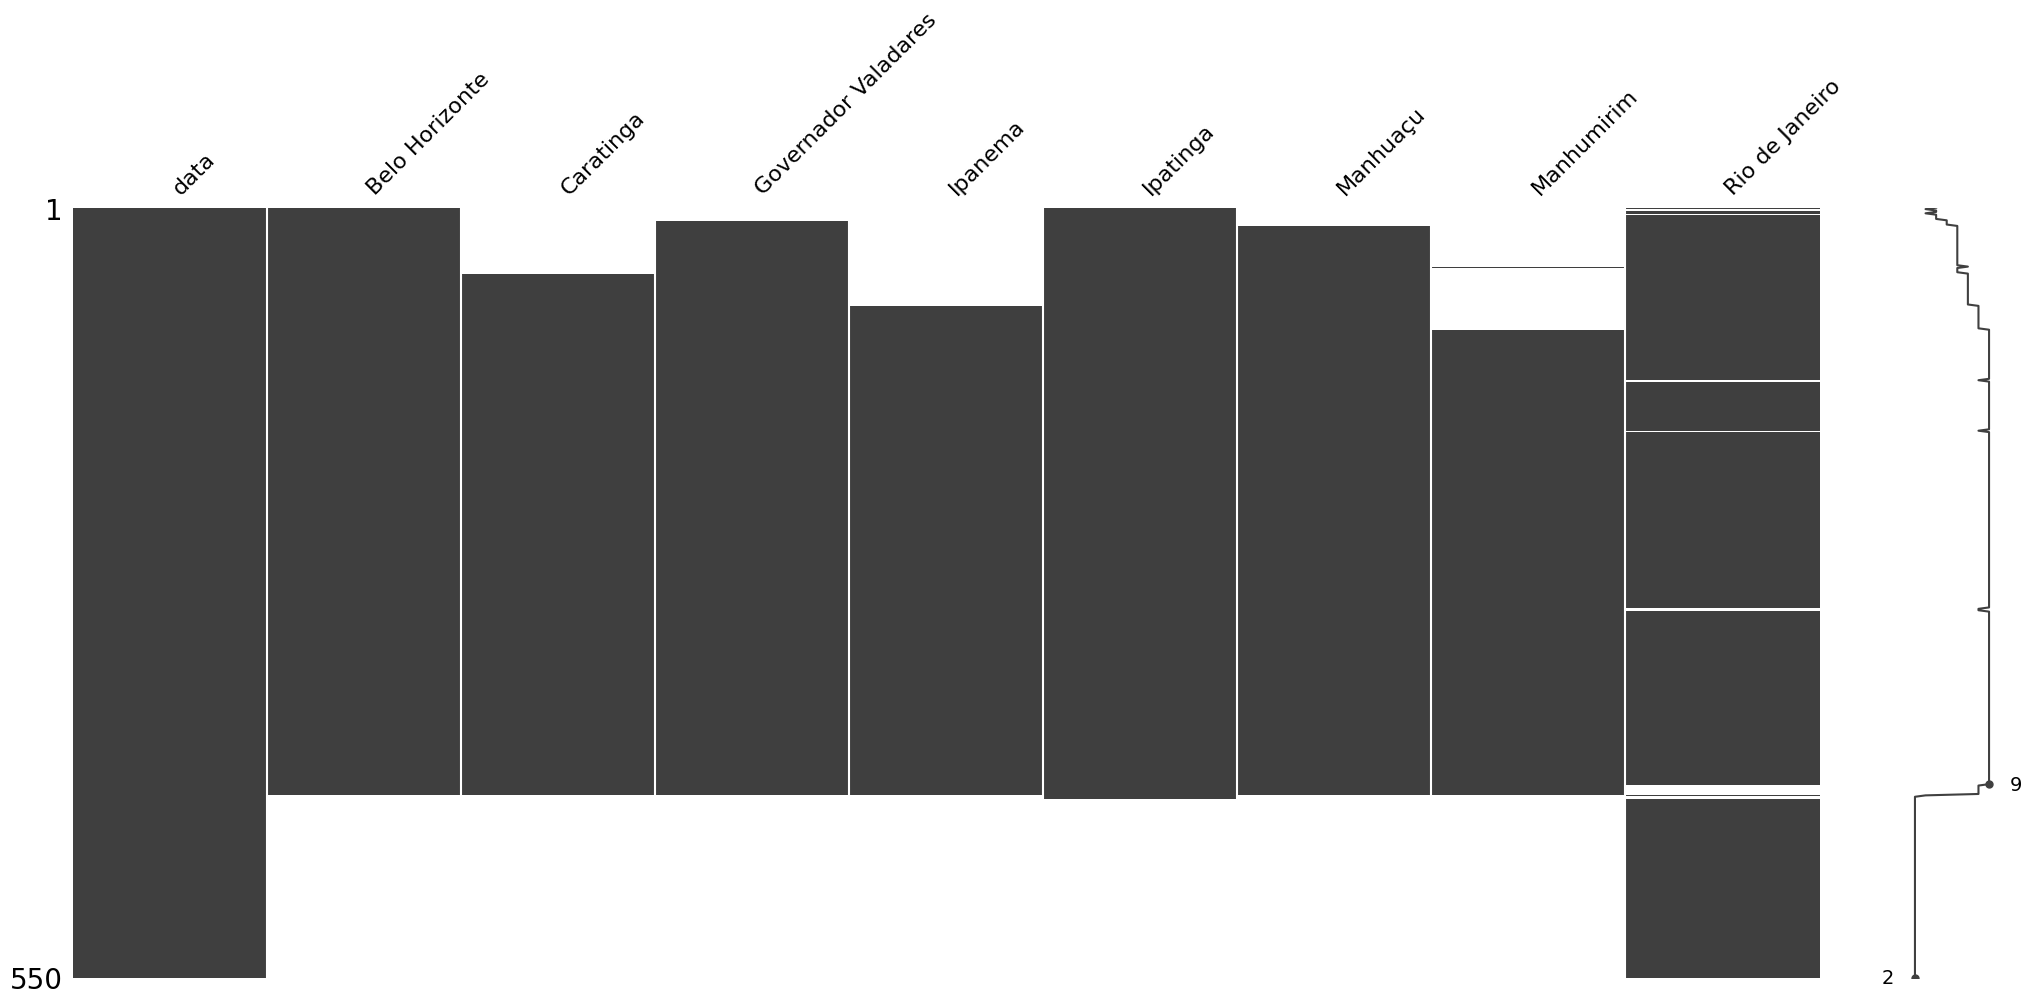

In [52]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataSetNoMissing)

In [53]:
dataSetNoMissing['Rio de Janeiro'].fillna(dataSetNoMissing['Rio de Janeiro'].median(), inplace=True)
# não ficou legal com a média

#dataSetNoMissing['Rio de Janeiro'].fillna(0, inplace=True)
#dataSetNoMissing.dropna(how='any')

<Axes: >

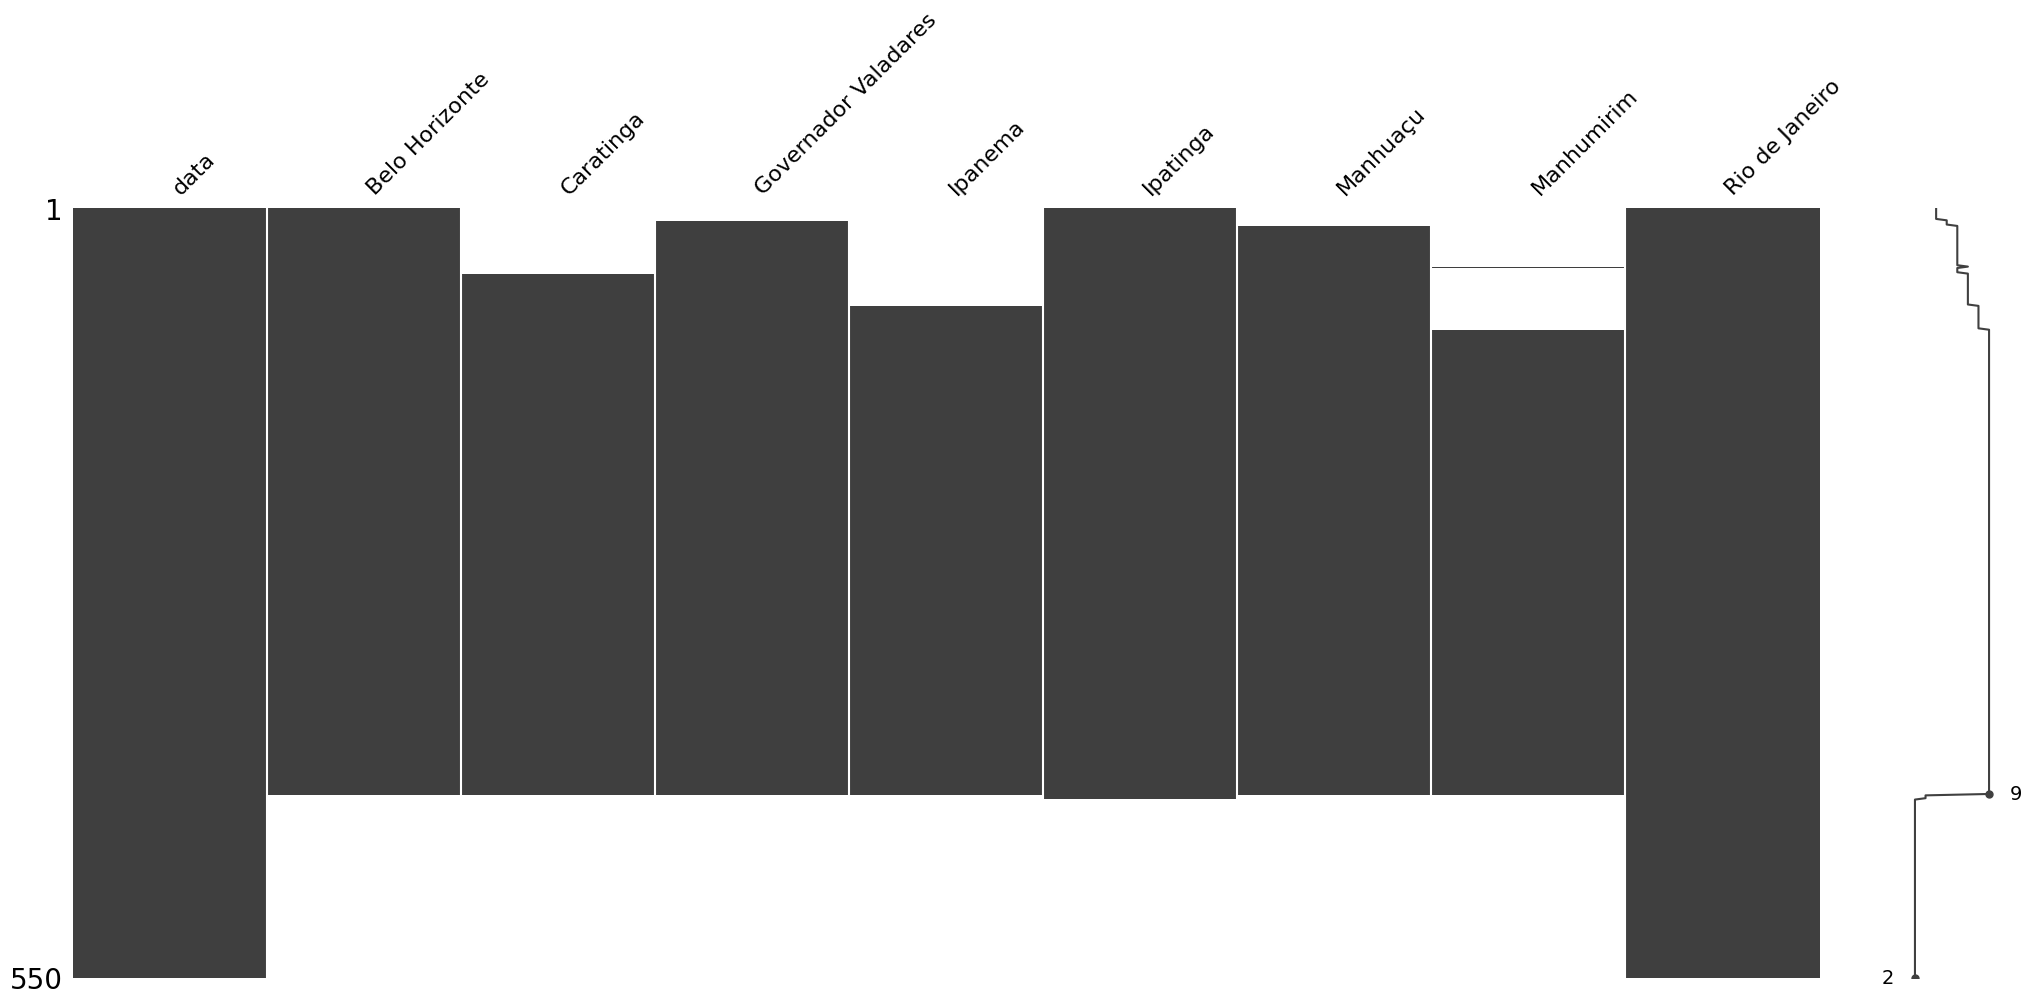

In [54]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(dataSetNoMissing)

(0, 0)     Belo Horizonte
(0, 1)     Caratinga
(0, 2)     Governador Valadares
(1, 0)     Ipanema
(1, 1)     Ipatinga
(1, 2)     Manhuaçu
(2, 0)     Manhumirim
(2, 1)     Rio de Janeiro


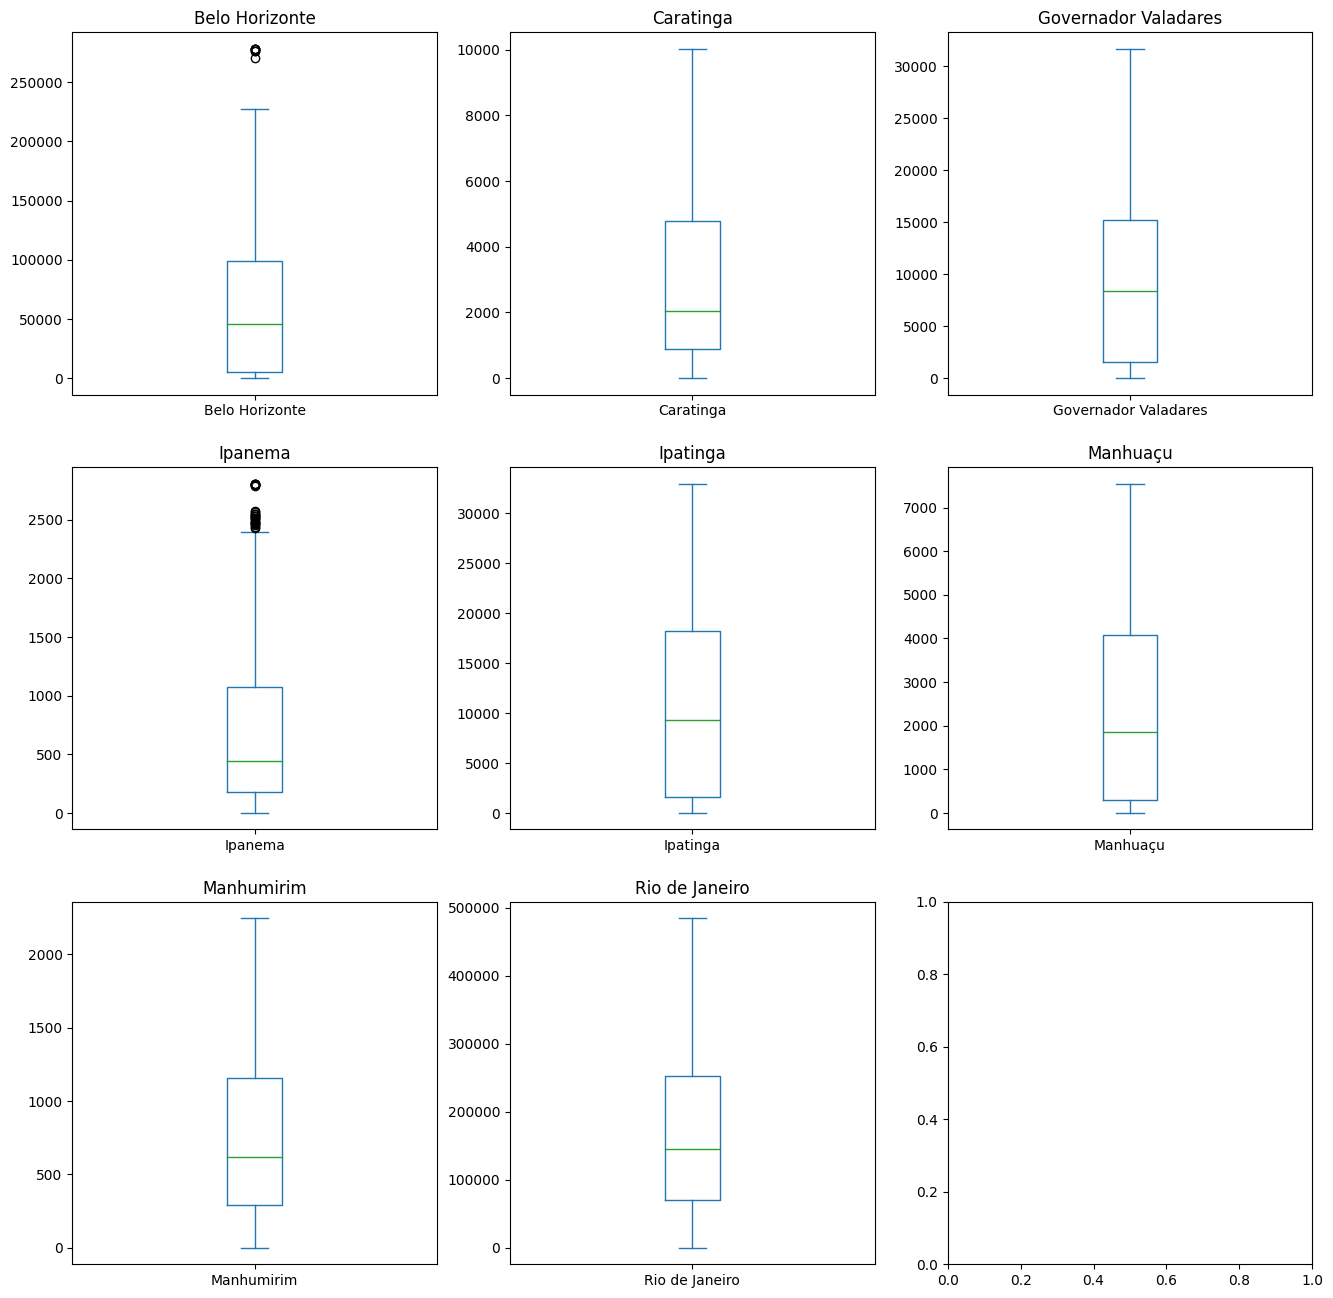

In [55]:
# Boxplot - Covid Confirmado para verificar outliers
fig, axs = plt.subplots(3, 3, figsize = (16, 16))
for loc, col in zip(itertools.product([0,1,2], [0,1,2]), dfCovidConfirmado.columns[1:]):
    print(loc, '   ', col)
    dfCovidConfirmado[col].plot.box(ax = axs.item(*loc), title = col)

In [56]:
# Copia do dataset para remoção de outliers
dfCovidConfirmadoRemocaoOutlies = dfCovidConfirmado.copy()
dfCovidConfirmadoRemocaoOutlies.head()

,data,Belo Horizonte,Caratinga,Governador Valadares,Ipanema,Ipatinga,Manhuaçu,Manhumirim,Rio de Janeiro
0,2020-03-16,1.0,NaN,NaN,NaN,1.0,NaN,NaN,23.0
1,2020-03-17,5.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,2020-03-18,10.0,NaN,NaN,NaN,1.0,NaN,NaN,55.0
3,2020-03-19,18.0,NaN,NaN,NaN,1.0,NaN,NaN,56.0
4,2020-03-20,20.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [57]:
# Função para remoção de outliers
def remocaoOutliers(df, cidade):
    Q1 = df[cidade].quantile(0.25)
    Q3 = df[cidade].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[cidade] < (Q1 - 1.5 * IQR)) | (df[cidade] > (Q3 + 1.5 * IQR)))]
    return df

In [58]:
# Antes da remoção dos outliers
dfCovidConfirmadoRemocaoOutlies.shape

(550, 9)

In [59]:
dfCovidConfirmadoRemocaoOutlies = remocaoOutliers(dfCovidConfirmadoRemocaoOutlies, 'Belo Horizonte')
dfCovidConfirmadoRemocaoOutlies = remocaoOutliers(dfCovidConfirmadoRemocaoOutlies, 'Ipanema')

In [60]:
# Depois da remoção dos outliers
dfCovidConfirmadoRemocaoOutlies.shape

(520, 9)

(0, 0)     Belo Horizonte
(0, 1)     Caratinga
(0, 2)     Governador Valadares
(1, 0)     Ipanema
(1, 1)     Ipatinga
(1, 2)     Manhuaçu
(2, 0)     Manhumirim
(2, 1)     Rio de Janeiro


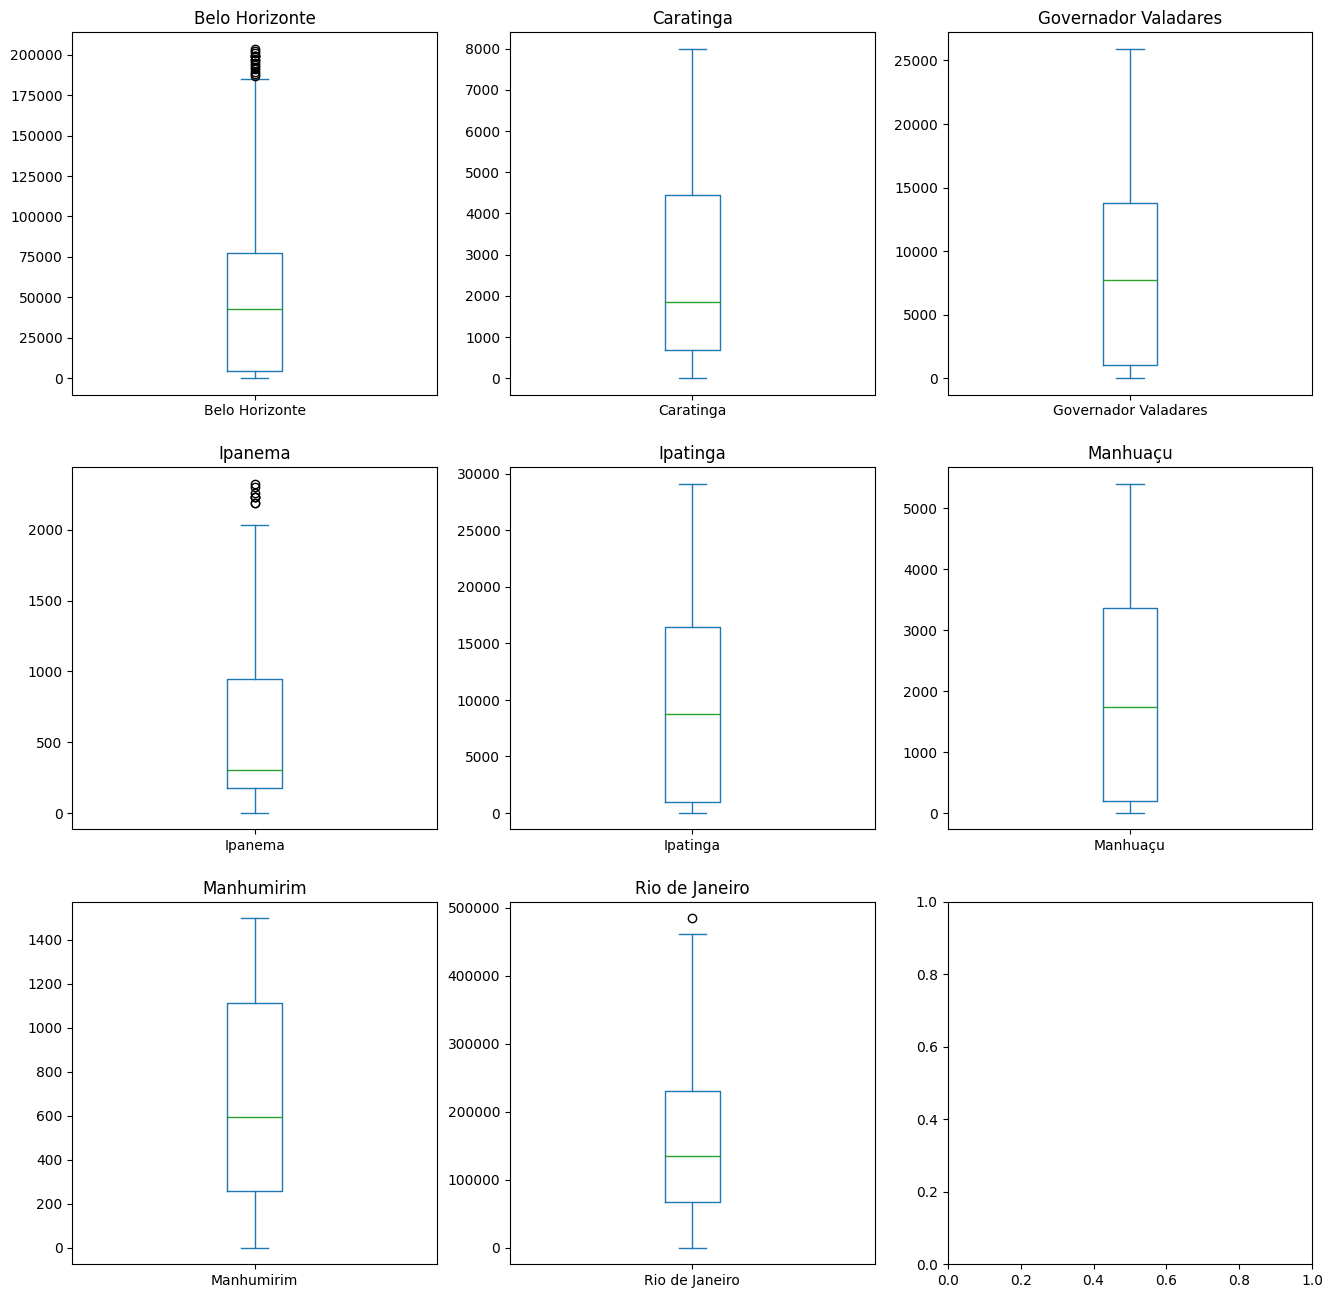

In [61]:
# Boxplot - Covid depois da remoção de outliers
fig, axs = plt.subplots(3, 3, figsize = (16, 16))
for loc, col in zip(itertools.product([0,1,2], [0,1,2]), dfCovidConfirmadoRemocaoOutlies.columns[1:]):
    print(loc, '   ', col)
    dfCovidConfirmadoRemocaoOutlies[col].plot.box(ax = axs.item(*loc), title = col)

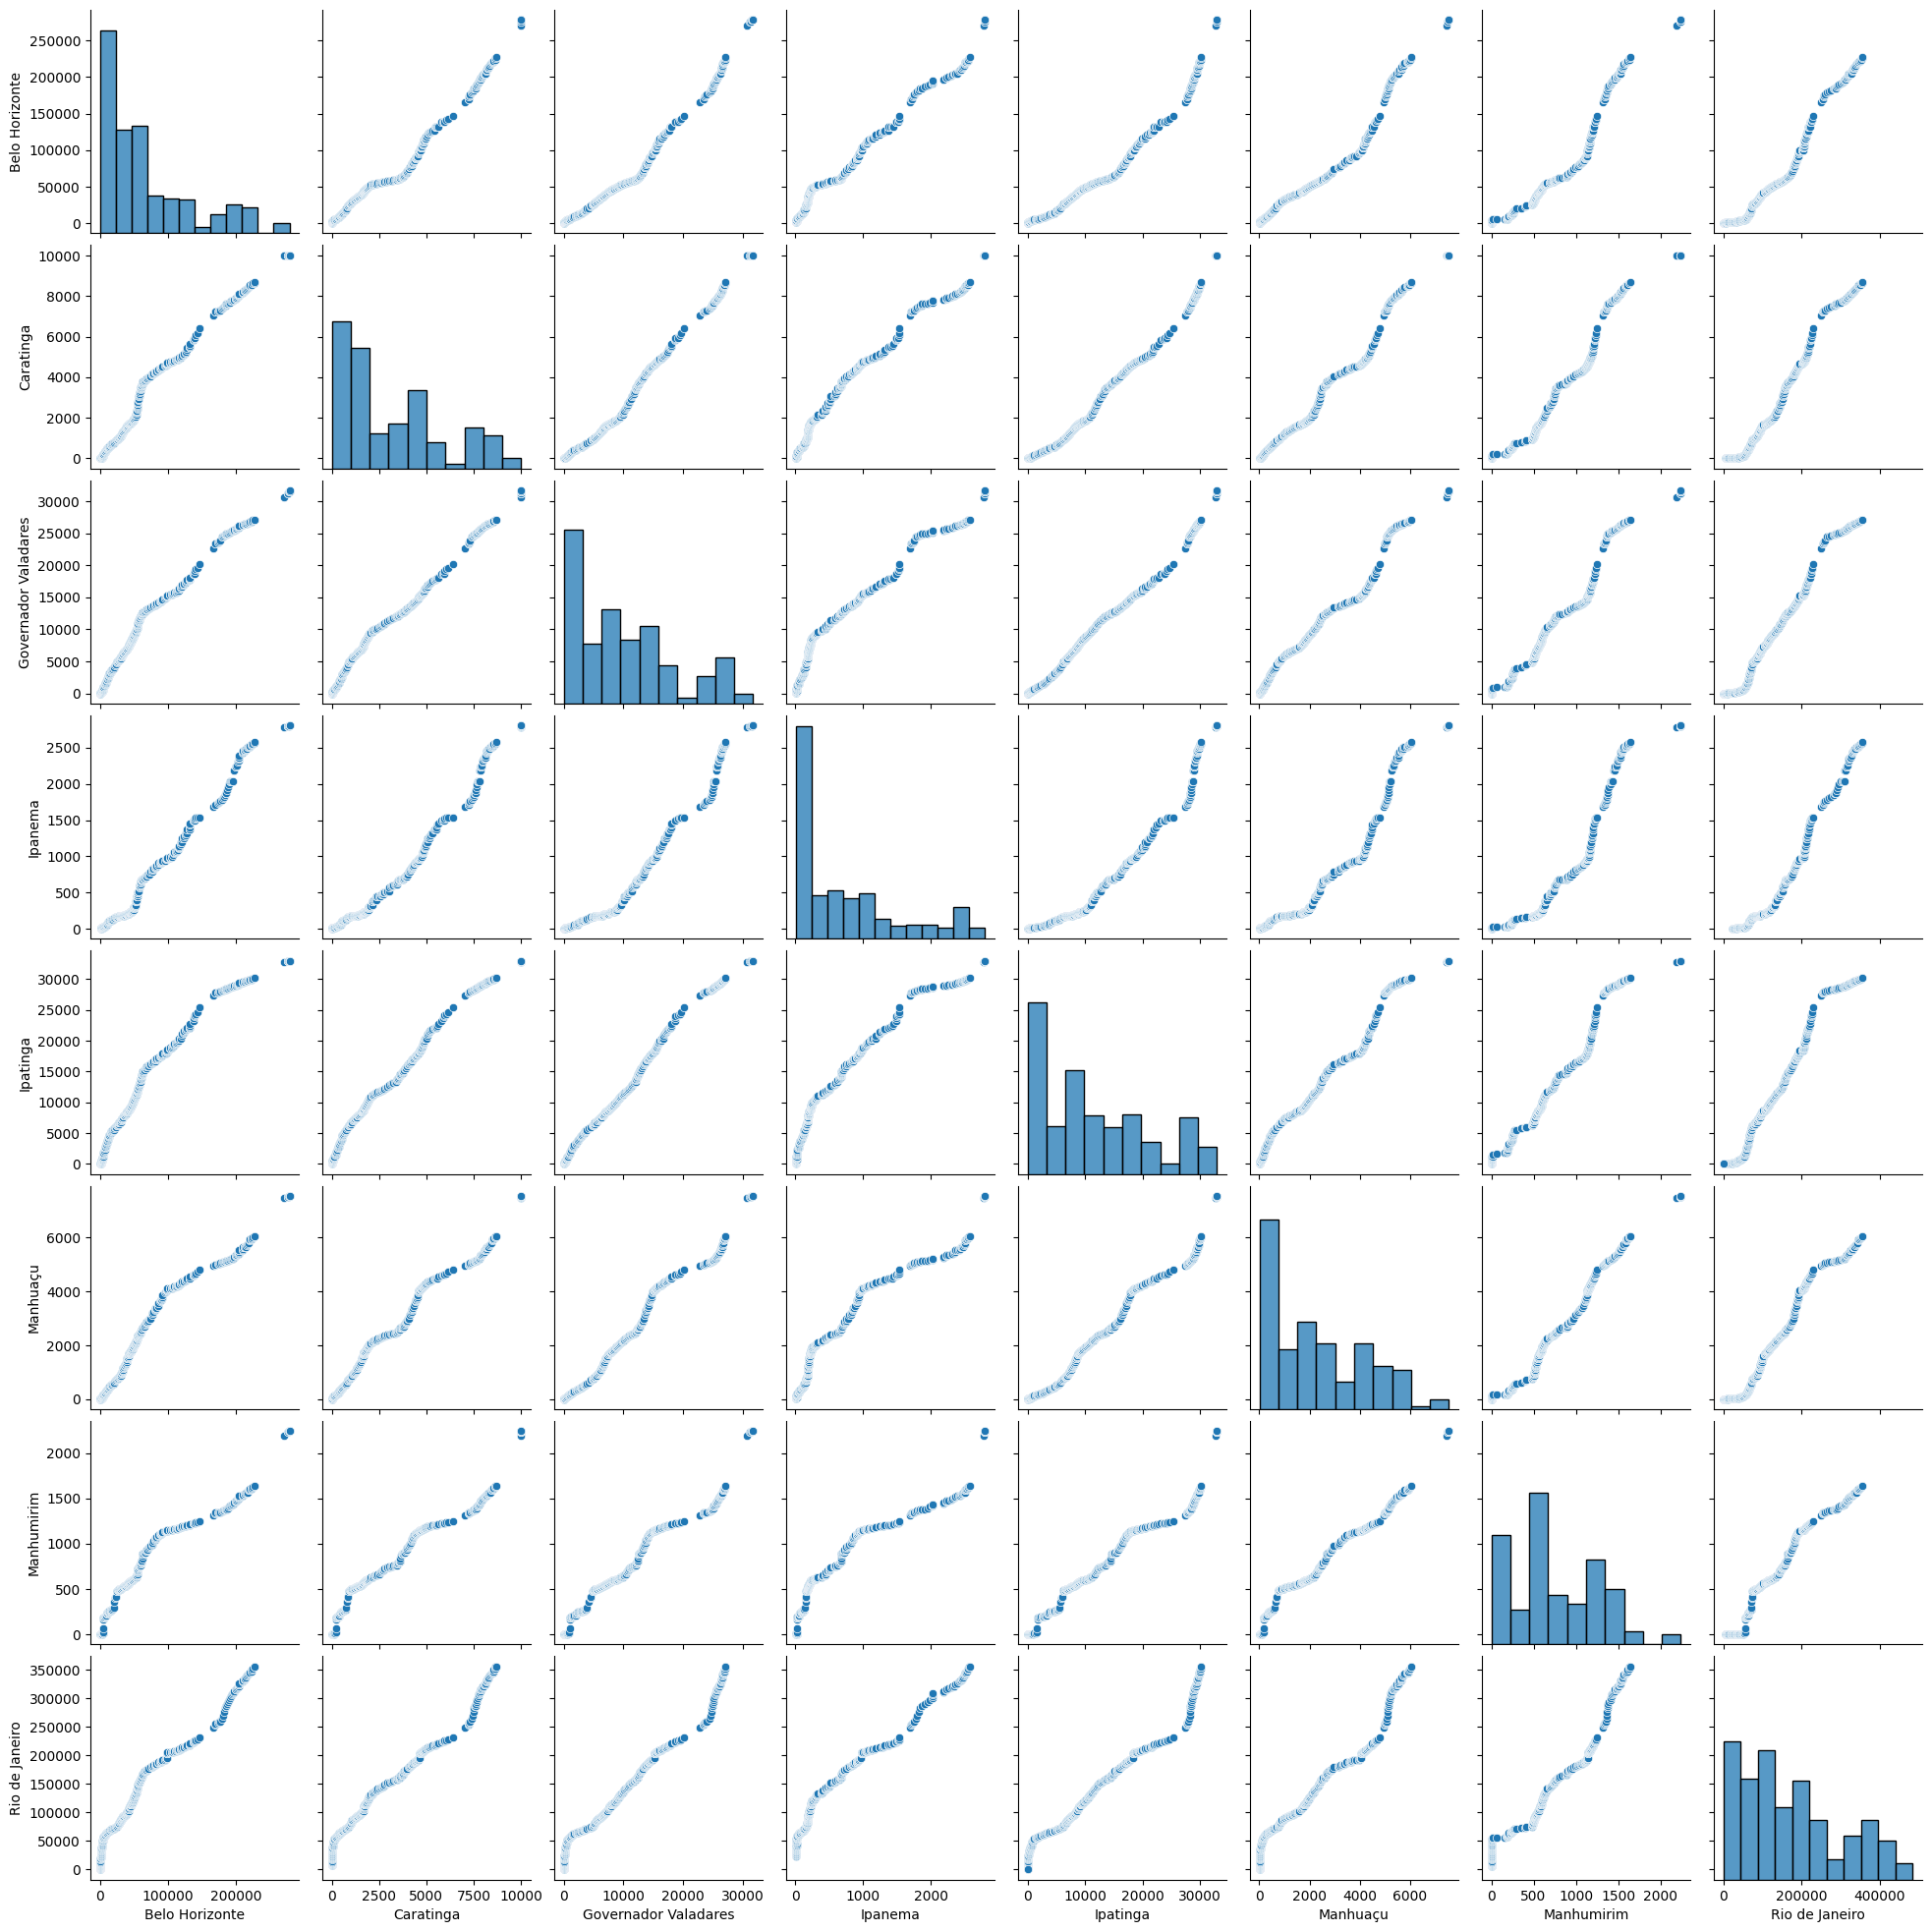

In [62]:
# Scatter Plot com Seaborn
sns.pairplot(dfCovidConfirmado)

(0, 0)     Belo Horizonte
(0, 1)     Caratinga
(0, 2)     Governador Valadares
(1, 0)     Ipanema
(1, 1)     Ipatinga
(1, 2)     Manhuaçu
(2, 0)     Manhumirim
(2, 1)     Rio de Janeiro


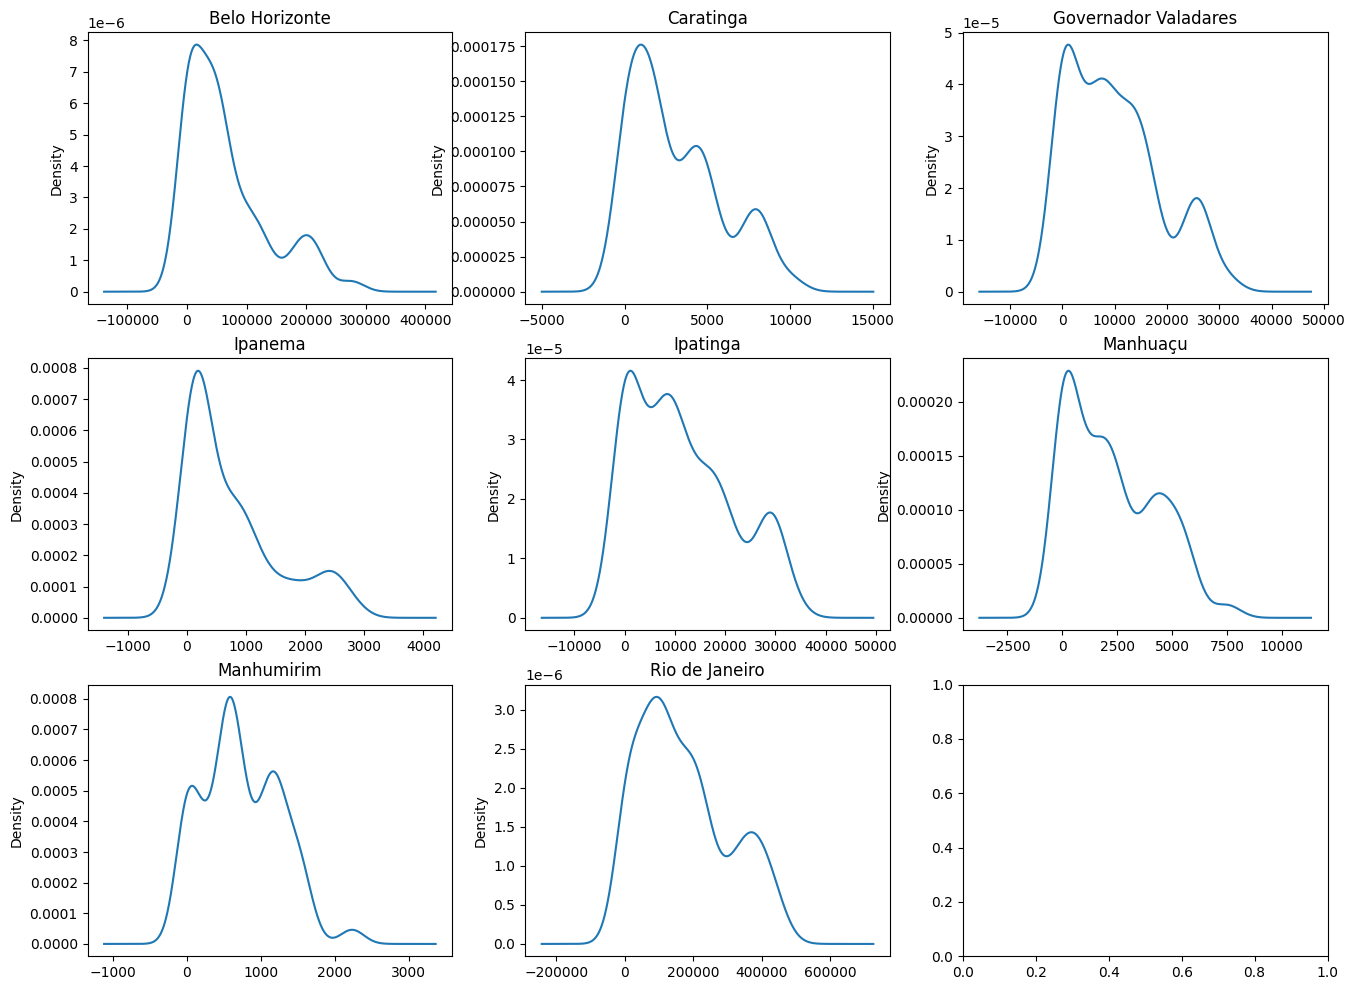

In [63]:
# Density Plot - Covid Confirmado
fig, axs = plt.subplots(3, 3, figsize = (16, 12))
for loc, col in zip(itertools.product([0,1,2], [0,1,2]), dfCovidConfirmado.columns[1:]):
    print(loc, '   ', col)
    dfCovidConfirmado[col].plot.kde(ax = axs.item(*loc), title = col)

# 7 - Correlações

**Normalização**

A normalização é uma técnica de escala na qual os valores são deslocados e redimensionados para que fiquem
entre 0 e 1. Também é conhecida como escala Min-Max.

**Padronização**

A padronização é outra técnica de dimensionamento em que os valores são centralizados em torno da média
com um desvio padão da unidade. Isso significa que a média do atributo torna-se zero e a distribuição resultante
tem um desvio padrão da unidade.

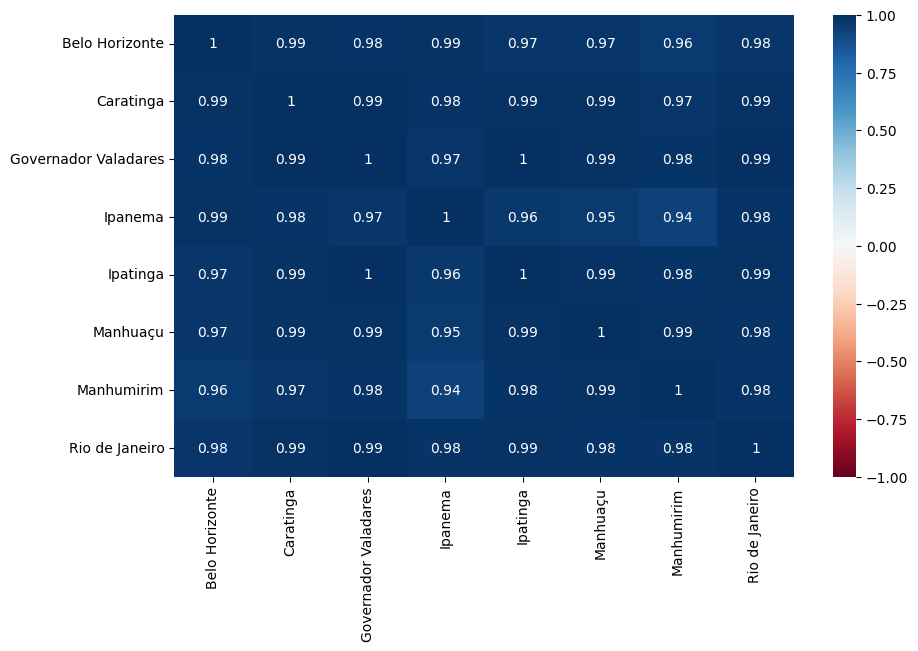

In [64]:
# Matriz de Correlação com Seaborn
plt.figure(figsize = (10,6))
sns.heatmap(dfCovidConfirmado.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

In [65]:
# Correlação entre casos confirmados e mortes utilizando a Correlação de Pearson
# Cidade de Belo Horizonte
dfCorrelacaoConfirmados = selecaoDados(['Belo Horizonte'], 'confirmados')
dfCorrelacaoMortes = selecaoDados(['Belo Horizonte'], 'mortes')

In [66]:
dfCorrelacaoConfirmados

,data,Belo Horizonte
0,2020-03-16,1
1,2020-03-17,5
2,2020-03-18,10
3,2020-03-19,18
4,2020-03-20,20
...,...,...
414,2021-09-14,276100
415,2021-09-17,278317
416,2021-09-18,278370
417,2021-09-20,278370


In [67]:
dfCorrelacaoMortes

,data,Belo Horizonte
0,2020-03-16,0
1,2020-03-17,0
2,2020-03-18,0
3,2020-03-19,0
4,2020-03-20,0
...,...,...
414,2021-09-14,6587
415,2021-09-17,6606
416,2021-09-18,6617
417,2021-09-20,6626


In [68]:
dfCorrelacao = pd.DataFrame()

In [69]:
dfCorrelacao = pd.merge(dfCorrelacaoConfirmados, dfCorrelacaoMortes, how='outer', on='data', suffixes=('_confirmados', '_mortes'))

In [70]:
dfCorrelacao

,data,Belo Horizonte_confirmados,Belo Horizonte_mortes
0,2020-03-16,1,0
1,2020-03-17,5,0
2,2020-03-18,10,0
3,2020-03-19,18,0
4,2020-03-20,20,0
...,...,...,...
414,2021-09-14,276100,6587
415,2021-09-17,278317,6606
416,2021-09-18,278370,6617
417,2021-09-20,278370,6626


Text(0.5, 0, 'Data')

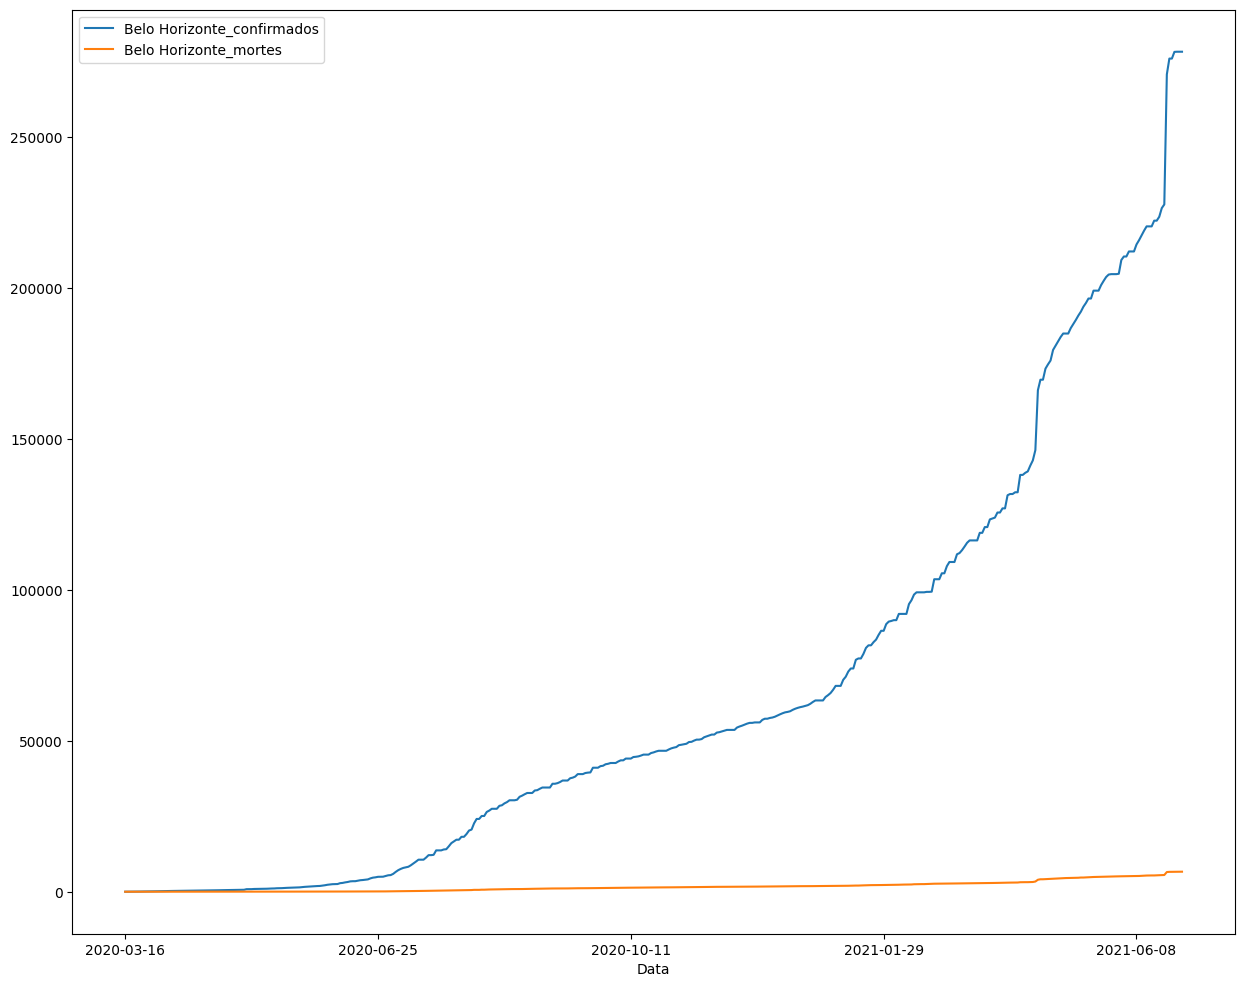

In [71]:
# Imprimindo um gráfico de linhas
dfCorrelacao.plot(x = 'data', y = dfCorrelacao.columns[1:], kind="line", figsize=(15,12))
plt.xlabel('Data')

In [72]:
# Correlação de Pearson
dfCorrelacao.corr(method="pearson")

,Belo Horizonte_confirmados,Belo Horizonte_mortes
Belo Horizonte_confirmados,1.000000,0.996431
Belo Horizonte_mortes,0.996431,1.000000


In [73]:
# Cidade do Rio de Janeiro
dfCorrelacaoConfirmados = selecaoDados(['Rio de Janeiro'], 'confirmados')
dfCorrelacaoMortes = selecaoDados(['Rio de Janeiro'], 'mortes')

dfCorrelacao = pd.DataFrame()

dfCorrelacao = pd.merge(dfCorrelacaoConfirmados, dfCorrelacaoMortes, how='outer', on='data', suffixes=('_confirmados', '_mortes'))

In [74]:
dfCorrelacao

,data,Rio de Janeiro_confirmados,Rio de Janeiro_mortes
0,2020-03-06,1,0
1,2020-03-08,2,0
2,2020-03-12,13,0
3,2020-03-15,22,0
4,2020-03-16,23,0
...,...,...,...
530,2021-09-01,450376,32091
531,2021-09-02,452320,32164
532,2021-09-15,461244,33045
533,2021-09-16,461469,33131


Text(0.5, 0, 'Data')

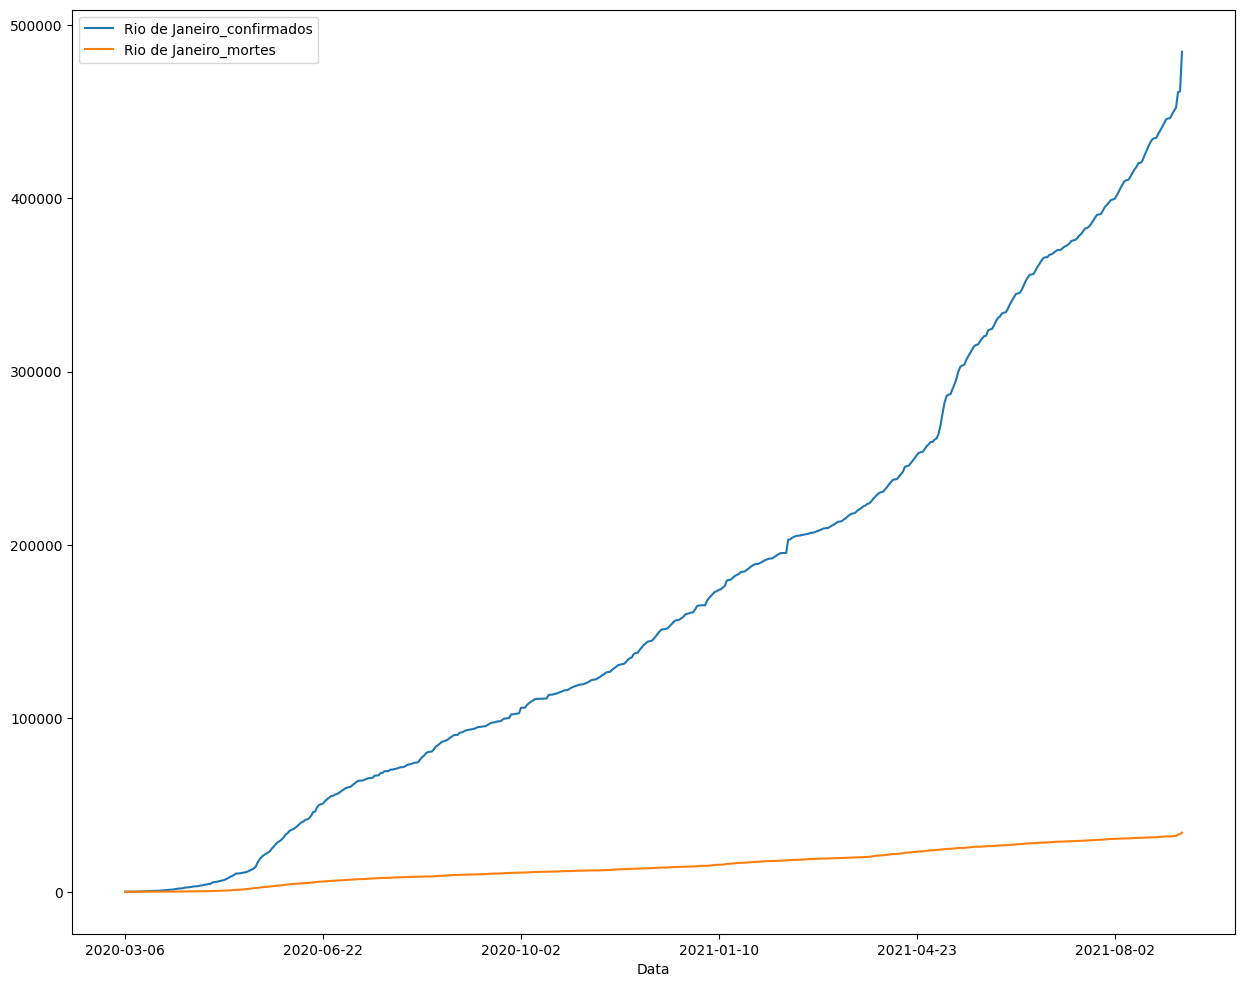

In [75]:
# Imprimindo um gráfico de linhas
dfCorrelacao.plot(x = 'data', y = dfCorrelacao.columns[1:], kind="line", figsize=(15,12))
plt.xlabel('Data')

In [76]:
# Correlação de Pearson
dfCorrelacao.corr(method="pearson")

,Rio de Janeiro_confirmados,Rio de Janeiro_mortes
Rio de Janeiro_confirmados,1.000000,0.989797
Rio de Janeiro_mortes,0.989797,1.000000


In [77]:
# Correlação de Spearman para o dataset completo
dfCovidConfirmado.corr(method="spearman")

,Belo Horizonte,Caratinga,Governador Valadares,Ipanema,Ipatinga,Manhuaçu,Manhumirim,Rio de Janeiro
Belo Horizonte,1.000000,0.999981,0.999978,0.999917,0.999922,0.999906,0.998931,0.999992
Caratinga,0.999981,1.000000,0.999988,0.999913,0.999979,0.999976,0.999371,0.999985
Governador Valadares,0.999978,0.999988,1.000000,0.999918,0.999969,0.999915,0.998935,0.999980
Ipanema,0.999917,0.999913,0.999918,1.000000,0.999917,0.999911,0.999847,0.999910
Ipatinga,0.999922,0.999979,0.999969,0.999917,1.000000,0.999889,0.998941,0.999928
Manhuaçu,0.999906,0.999976,0.999915,0.999911,0.999889,1.000000,0.998971,0.999901
Manhumirim,0.998931,0.999371,0.998935,0.999847,0.998941,0.998971,1.000000,0.998835
Rio de Janeiro,0.999992,0.999985,0.999980,0.999910,0.999928,0.999901,0.998835,1.000000


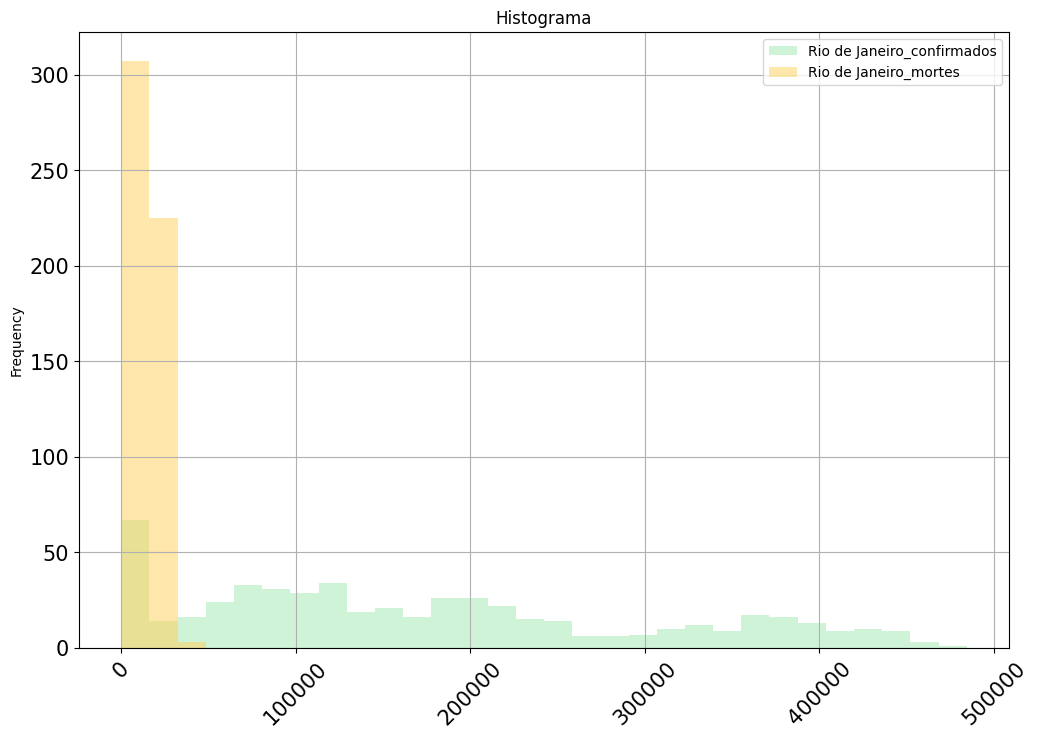

In [78]:
# Histograma - Rio de Janeiro
dfCorrelacao.plot(kind='hist',
        alpha=0.5,
        bins=30,
        title='Histograma',
        x = 'data', y = dfCorrelacao.columns[1:],
        rot=45,
        grid=True,
        figsize=(12,8),
        fontsize=15, 
        color=['#A0E8AF', '#FFCF56']);

array([[<Axes: title={'center': 'Rio de Janeiro_mortes'}>]], dtype=object)

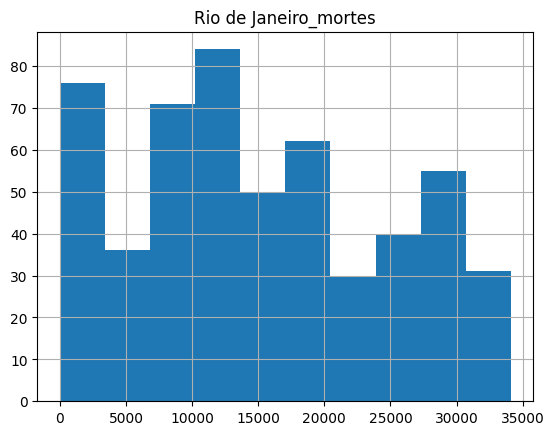

In [79]:
dfCorrelacao.hist(column=dfCorrelacao.columns[-1])

array([[<Axes: title={'center': 'Rio de Janeiro_confirmados'}>]],
      dtype=object)

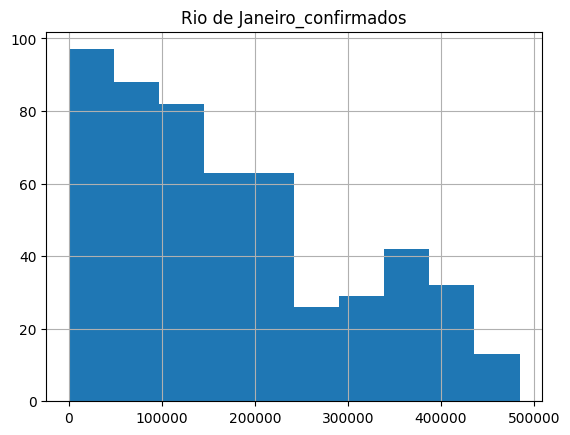

In [80]:
dfCorrelacao.hist(column=dfCorrelacao.columns[-2])

In [81]:
dfCovidConfirmado

,data,Belo Horizonte,Caratinga,Governador Valadares,Ipanema,Ipatinga,Manhuaçu,Manhumirim,Rio de Janeiro
0,2020-03-16,1.0,NaN,NaN,NaN,1.0,NaN,NaN,23.0
1,2020-03-17,5.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,2020-03-18,10.0,NaN,NaN,NaN,1.0,NaN,NaN,55.0
3,2020-03-19,18.0,NaN,NaN,NaN,1.0,NaN,NaN,56.0
4,2020-03-20,20.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
545,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,450376.0
546,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,452320.0
547,2021-09-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461244.0
548,2021-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,461469.0


In [82]:
# Matriz de correlação
dfCovidConfirmado.corr()

,Belo Horizonte,Caratinga,Governador Valadares,Ipanema,Ipatinga,Manhuaçu,Manhumirim,Rio de Janeiro
Belo Horizonte,1.000000,0.987162,0.982856,0.991465,0.974185,0.972995,0.956501,0.976170
Caratinga,0.987162,1.000000,0.994422,0.983476,0.991893,0.987967,0.974315,0.990457
Governador Valadares,0.982856,0.994422,1.000000,0.971591,0.996989,0.989738,0.982109,0.992413
Ipanema,0.991465,0.983476,0.971591,1.000000,0.964680,0.954744,0.936770,0.979050
Ipatinga,0.974185,0.991893,0.996989,0.964680,1.000000,0.990793,0.982938,0.990564
Manhuaçu,0.972995,0.987967,0.989738,0.954744,0.990793,1.000000,0.988375,0.982383
Manhumirim,0.956501,0.974315,0.982109,0.936770,0.982938,0.988375,1.000000,0.978492
Rio de Janeiro,0.976170,0.990457,0.992413,0.979050,0.990564,0.982383,0.978492,1.000000


# 8 - Normalização e Padronização

In [83]:
# Normalização
# Cidade do Rio de Janeiro
dfNormalizacaoConfirmados = selecaoDados(['Rio de Janeiro'], 'confirmados')
dfNormalizacaoMortes = selecaoDados(['Rio de Janeiro'], 'mortes')

dfNormalizacao = pd.DataFrame()

dfNormalizacao = pd.merge(dfNormalizacaoConfirmados, dfNormalizacaoMortes, how='outer', on='data', suffixes=('_confirmados', '_mortes'))

dfNormalizacao

,data,Rio de Janeiro_confirmados,Rio de Janeiro_mortes
0,2020-03-06,1,0
1,2020-03-08,2,0
2,2020-03-12,13,0
3,2020-03-15,22,0
4,2020-03-16,23,0
...,...,...,...
530,2021-09-01,450376,32091
531,2021-09-02,452320,32164
532,2021-09-15,461244,33045
533,2021-09-16,461469,33131


,Rio de Janeiro_confirmados,Rio de Janeiro_mortes
0,1,0
1,2,0
2,13,0
3,22,0
4,23,0
...,...,...
530,450376,32091
531,452320,32164
532,461244,33045
533,461469,33131


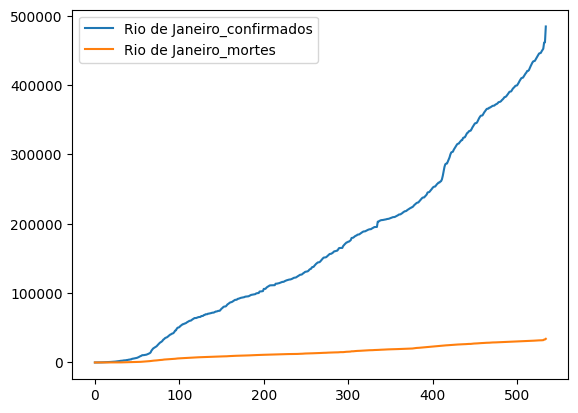

In [84]:
# Removendo a primeira coluna do dataframe
dfNormalizacao.drop('data', axis=1, inplace=True)
dfNormalizacao.plot()
dfNormalizacao

,Rio de Janeiro_confirmados,Rio de Janeiro_mortes
0,0.000000,0.000000
1,0.000002,0.000000
2,0.000025,0.000000
3,0.000043,0.000000
4,0.000045,0.000000
...,...,...
530,0.929697,0.941030
531,0.933710,0.943170
532,0.952132,0.969005
533,0.952596,0.971527


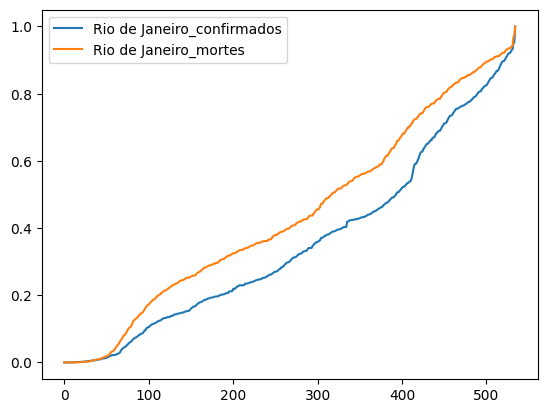

In [85]:
# Dados normalizados
X_dfNormalizacao = dfNormalizacao.copy()
X_dfNormalizacao[X_dfNormalizacao.columns] = MinMaxScaler().fit_transform(dfNormalizacao[dfNormalizacao.columns])
X_dfNormalizacao.plot()
X_dfNormalizacao

In [86]:
# Padronização
# Cidade do Rio de Janeiro
dfPadronizacaoConfirmados = selecaoDados(['Rio de Janeiro'], 'confirmados')
dfPadronizacaoMortes = selecaoDados(['Rio de Janeiro'], 'mortes')

dfPadronizacao = pd.DataFrame()

dfPadronizacao = pd.merge(dfPadronizacaoConfirmados, dfPadronizacaoMortes, how='outer', on='data', suffixes=('_confirmados', '_mortes'))

dfPadronizacao

,data,Rio de Janeiro_confirmados,Rio de Janeiro_mortes
0,2020-03-06,1,0
1,2020-03-08,2,0
2,2020-03-12,13,0
3,2020-03-15,22,0
4,2020-03-16,23,0
...,...,...,...
530,2021-09-01,450376,32091
531,2021-09-02,452320,32164
532,2021-09-15,461244,33045
533,2021-09-16,461469,33131


,Rio de Janeiro_confirmados,Rio de Janeiro_mortes
0,1,0
1,2,0
2,13,0
3,22,0
4,23,0
...,...,...
530,450376,32091
531,452320,32164
532,461244,33045
533,461469,33131


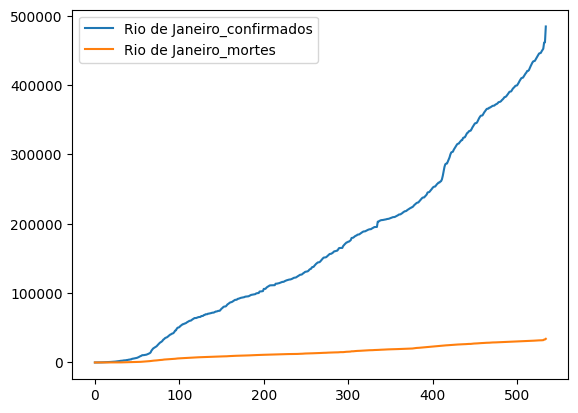

In [87]:
# Removendo a primeira coluna do dataframe
dfPadronizacao.drop('data', axis=1, inplace=True)
dfPadronizacao.plot()
dfPadronizacao

,Rio de Janeiro_confirmados,Rio de Janeiro_mortes
0,-1.331283,-1.564230
1,-1.331276,-1.564230
2,-1.331191,-1.564230
3,-1.331121,-1.564230
4,-1.331113,-1.564230
...,...,...
530,2.144375,1.773461
531,2.159377,1.781054
532,2.228246,1.872684
533,2.229982,1.881629


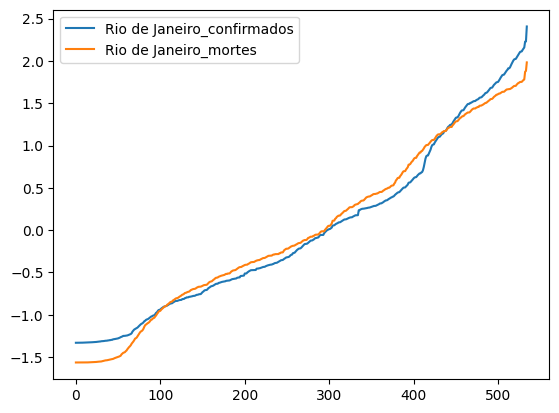

In [88]:
# Dados padronizados
X_dfPadronizacao = dfPadronizacao.copy()
X_dfPadronizacao[X_dfPadronizacao.columns] = StandardScaler().fit_transform(dfPadronizacao[dfPadronizacao.columns])
X_dfPadronizacao.plot()
X_dfPadronizacao